In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 30)

#sns.set_style("whitegrid")
#plt.style.use('bmh')
plt.style.use('seaborn-whitegrid')

# this allows plots to appear directly in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
train_df = pd.read_csv('data/train.csv')
train_df['data_set'] = 'train'
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,train
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,train
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,train
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,train


In [9]:
test_df = pd.read_csv('data/test.csv')
test_df['data_set'] = 'test'
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,data_set
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,test
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,test
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,test
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,test
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,test
...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,test
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,test
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,test
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,test


In [5]:
# combine train and test data into one df
test_df['registered'] = 0
test_df['casual'] = 0
test_df['count'] = 0

all_df = pd.concat([train_df, test_df])
all_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train


In [6]:
all_df.tail(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,0,0,test
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0,0,0,test
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,0,0,0,test


In [10]:
all_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,0,0,test
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0,0,0,test


In [7]:
all_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'data_set'],
      dtype='object')

In [ ]:
# lowercase column names
#all_df.columns = map(str.lower, all_df.columns)
#all_df.columns

In [11]:
# parse datetime colum & add new time related columns
dt = pd.DatetimeIndex(all_df['datetime'])
all_df.set_index(dt, inplace=True)

In [12]:
all_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train


In [13]:
# Indexing by datetime let's us to select rows by specifying time ranges
all_df['2011-01-01 01:00:00':'2011-01-01 05:00:00']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
datetime,,,,,,,,,,,,,
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,train
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,train
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,train
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,train
2011-01-01 05:00:00,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,train


In [14]:
# find missing values in dataset if any
all_df.isnull().values.sum()

0

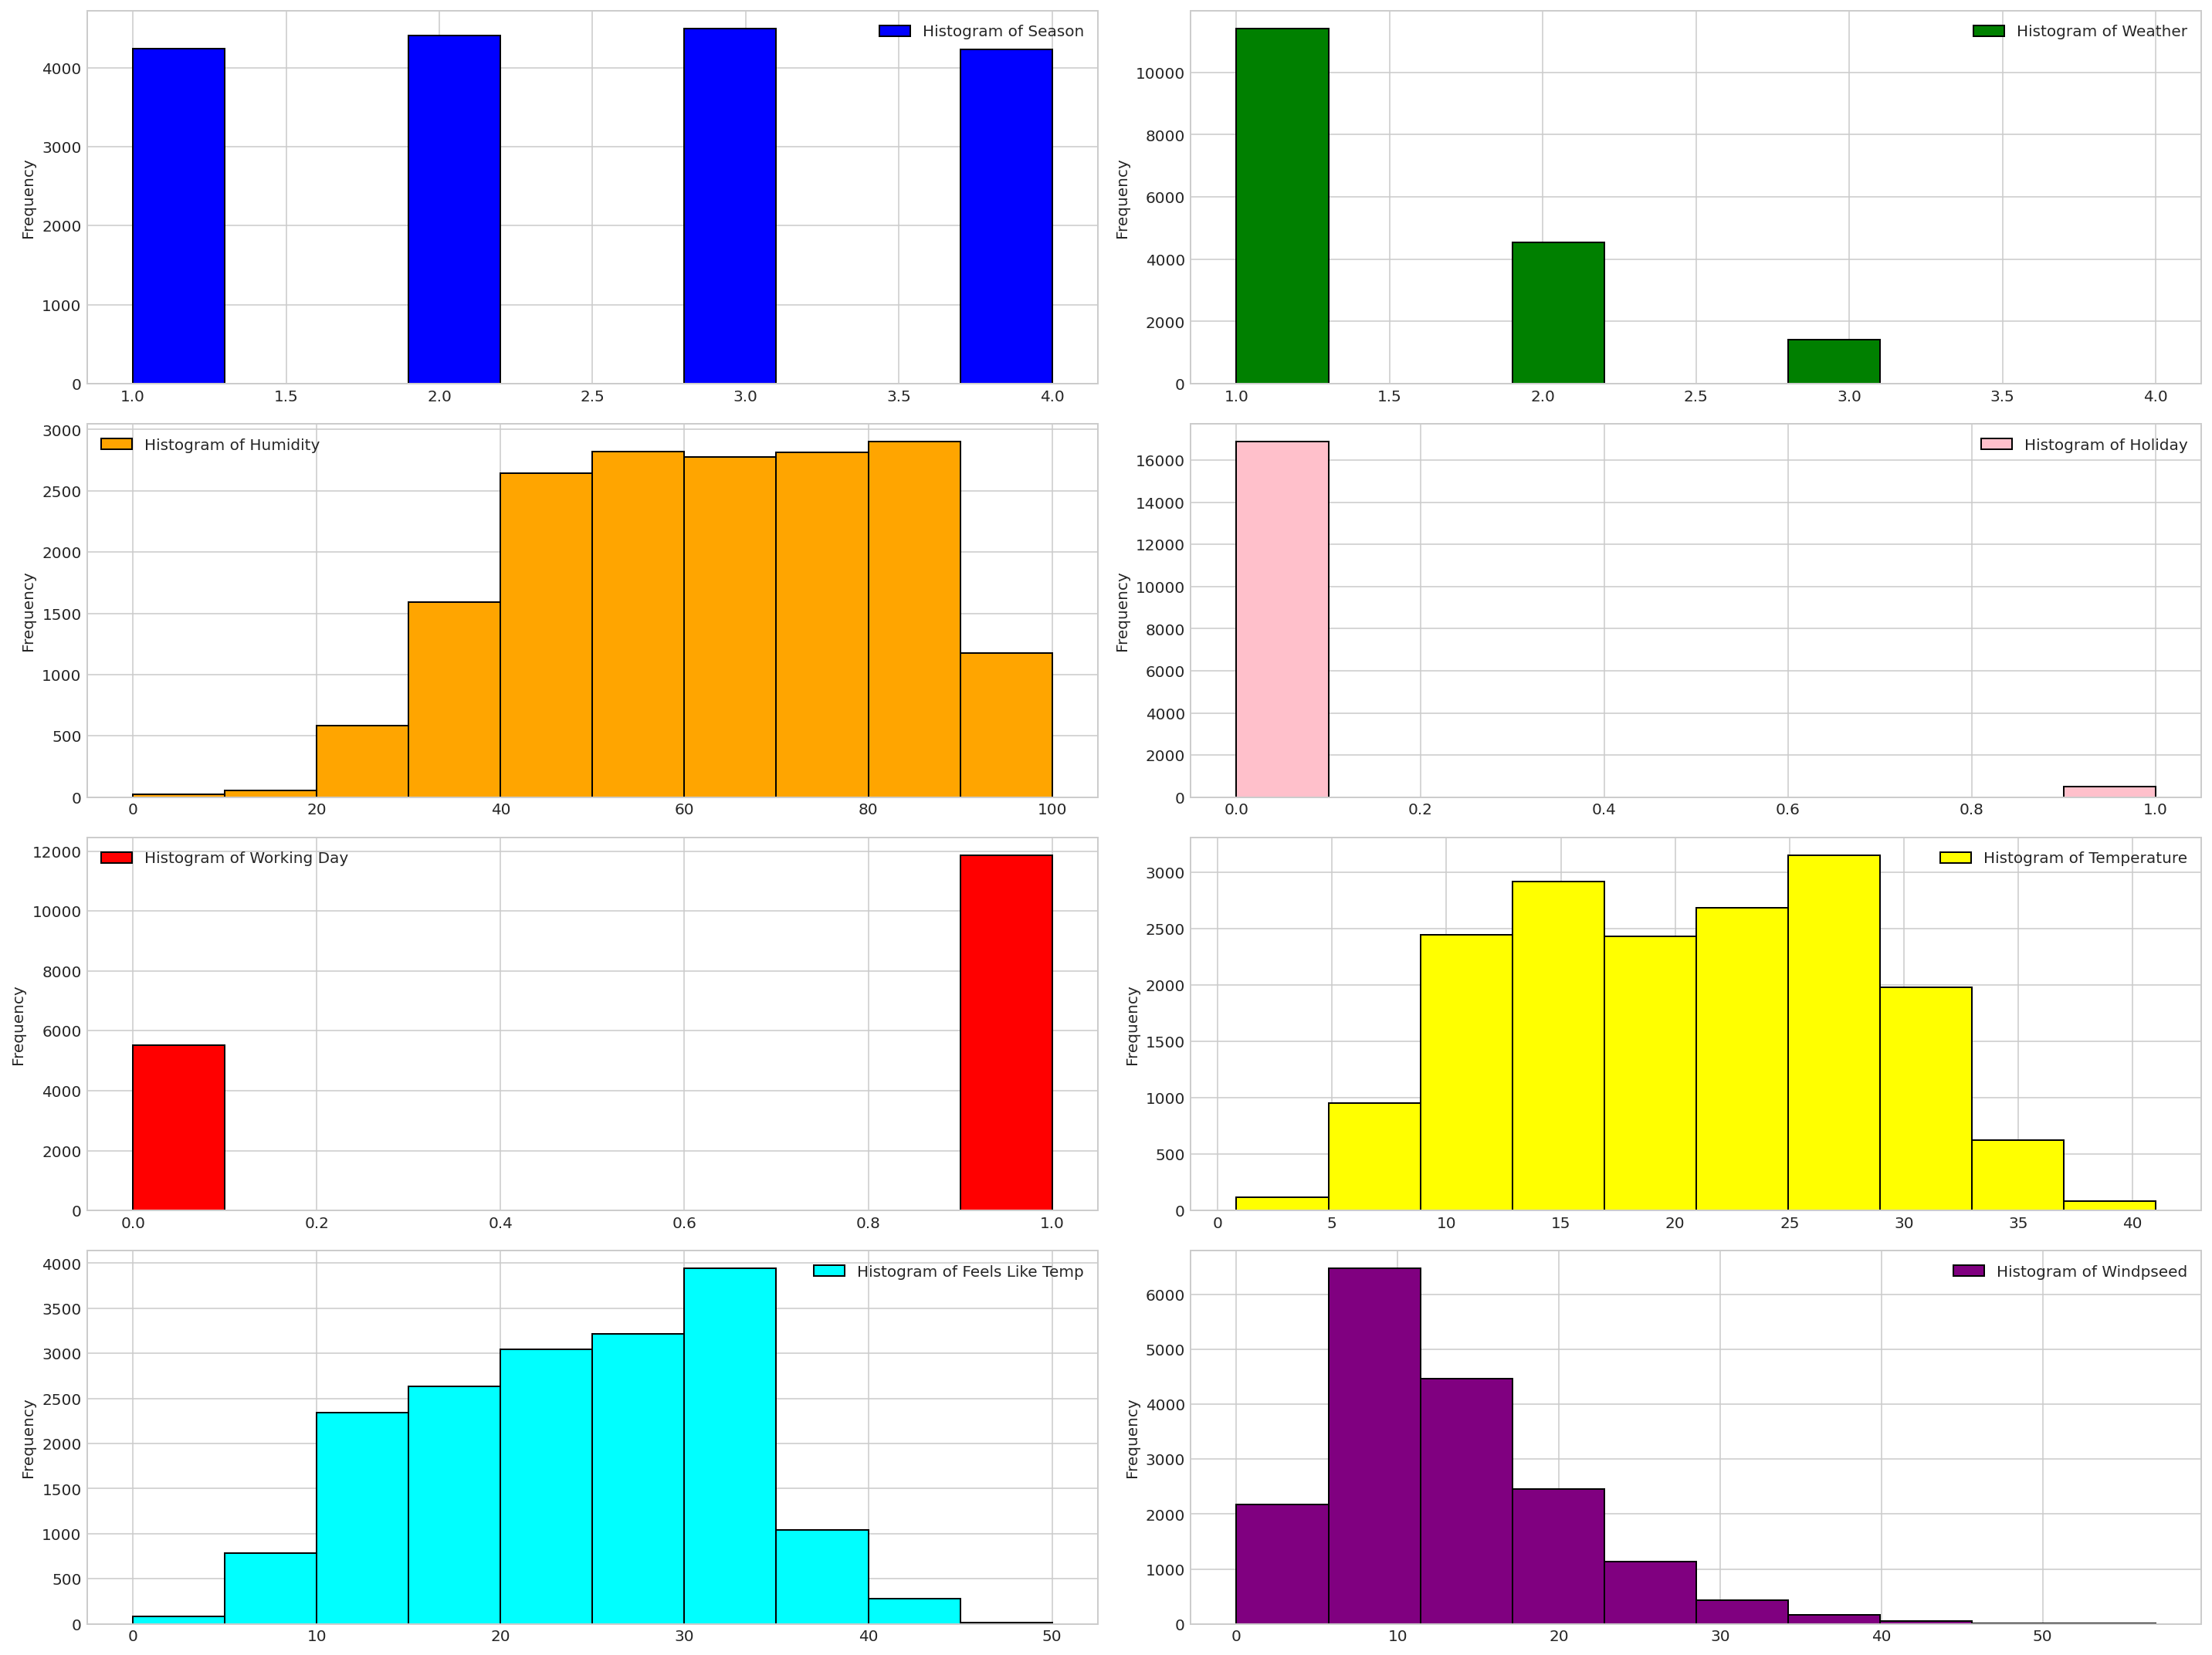

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(421)
all_df['season'].plot.hist(bins=10, color='blue', label='Histogram of Season', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)
all_df['weather'].plot.hist(bins=10, color='green', label='Histogram of Weather', edgecolor='black')
plt.legend(loc='best')
plt.subplot(423)
all_df['humidity'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)
all_df['holiday'].plot.hist(bins=10, color='pink', label='Histogram of Holiday', edgecolor='black')
plt.legend(loc='best')
plt.subplot(425)
all_df['workingday'].plot.hist(bins=10, color='red', label='Histogram of Working Day', edgecolor='black')
plt.legend(loc='best')
plt.subplot(426)
all_df['temp'].plot.hist(bins=10, color='yellow', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')
plt.subplot(427)
all_df['atemp'].plot.hist(bins=10, color='cyan', label='Histogram of Feels Like Temp', edgecolor='black')
plt.legend(loc='best')
plt.subplot(428)
all_df['windspeed'].plot.hist(bins=10, color='purple', label='Histogram of Windpseed', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

In [16]:
# logarithmic transformation of dependent cols
# (adding 1 first so that 0 values don't become -inf)
for col in ['casual', 'registered', 'count']:
    all_df[f'{col}_log'] = np.log(all_df[col] + 1)

In [17]:
all_df['date'] = dt.date # yyyymmdd
all_df['day'] = dt.day # dd
all_df['month'] = dt.month # mm
all_df['year'] = dt.year # yyyy
all_df['hour'] = dt.hour # hh
all_df['dow'] = dt.dayofweek #曜日 Mon:0 Tue:1 Wed:2 Thu:3 Fri:4 Sat:5 Sun:6
all_df['woy'] = dt.isocalendar().week #その日の週が年間で見ると何番目の週かを表す数字 [dt.weekofyear]は deprecated

In [18]:
# How many columns have null values
all_df.isnull().sum()

datetime          0
season            0
holiday           0
workingday        0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
casual            0
registered        0
count             0
data_set          0
casual_log        0
registered_log    0
count_log         0
date              0
day               0
month             0
year              0
hour              0
dow               0
woy               0
dtype: int64

In [ ]:
# interpolate weather, temp, atemp, humidity, windspeed このセルは不要では？？
#all_df["weather"] = all_df["weather"].interpolate(method='time').apply(np.round)
#all_df["temp"] = all_df["temp"].interpolate(method='time')
#all_df["atemp"] = all_df["atemp"].interpolate(method='time')
#all_df["humidity"] = all_df["humidity"].interpolate(method='time').apply(np.round)
#all_df["windspeed"] = all_df["windspeed"].interpolate(method='time')

In [19]:
# add a count_season column using join
by_season = all_df[all_df['data_set'] == 'train'].copy().groupby(['season'])[['count']].agg(sum)
by_season.columns = ['count_season']
all_df = all_df.join(by_season, on='season')

In [20]:
print(by_season)

        count_season
season              
1             312498
2             588282
3             640662
4             544034


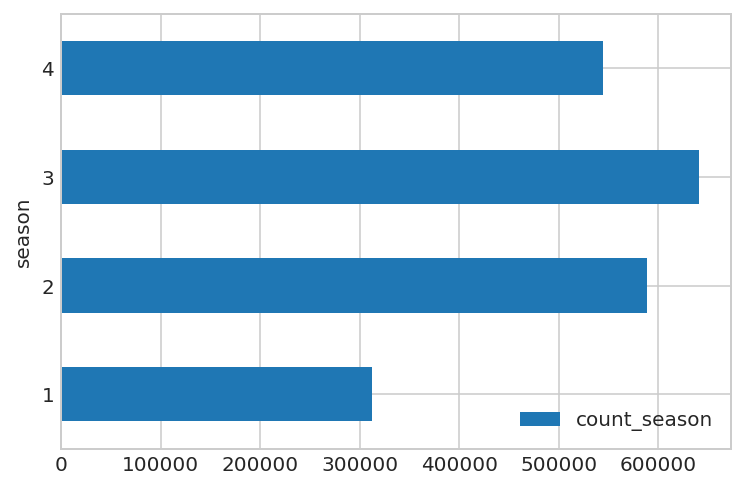

In [21]:
by_season.plot(kind='barh')
plt.grid(True)
plt.show();

In [22]:
# これは流石に気づかない気がする。。。気づけない気がする。。。
def get_day(day_start):
    day_end = day_start + pd.offsets.DateOffset(hours=23)
    return pd.date_range(day_start, day_end, freq="H")

# tax day
all_df.loc[get_day(datetime(2011, 4, 15)), "workingday"] = 1
all_df.loc[get_day(datetime(2012, 4, 16)), "workingday"] = 1

# thanksgiving friday
all_df.loc[get_day(datetime(2011, 11, 25)), "workingday"] = 0
all_df.loc[get_day(datetime(2012, 11, 23)), "workingday"] = 0

# tax day
all_df.loc[get_day(datetime(2011, 4, 15)), "holiday"] = 0
all_df.loc[get_day(datetime(2012, 4, 16)), "holiday"] = 0

# thanksgiving friday
all_df.loc[get_day(datetime(2011, 11, 25)), "holiday"] = 1
all_df.loc[get_day(datetime(2012, 11, 23)), "holiday"] = 1

#storms
all_df.loc[get_day(datetime(2012, 5, 21)), "holiday"] = 1

#tornado
all_df.loc[get_day(datetime(2012, 6, 1)), "holiday"] = 1

In [23]:
by_hour = all_df[all_df['data_set'] == 'train'].copy().groupby(['hour', 'workingday'])['count'].agg('sum').unstack()
by_hour.head(3)

workingday,0,1
hour,,
0,13633,11455
1,10384,4988
2,7654,2605


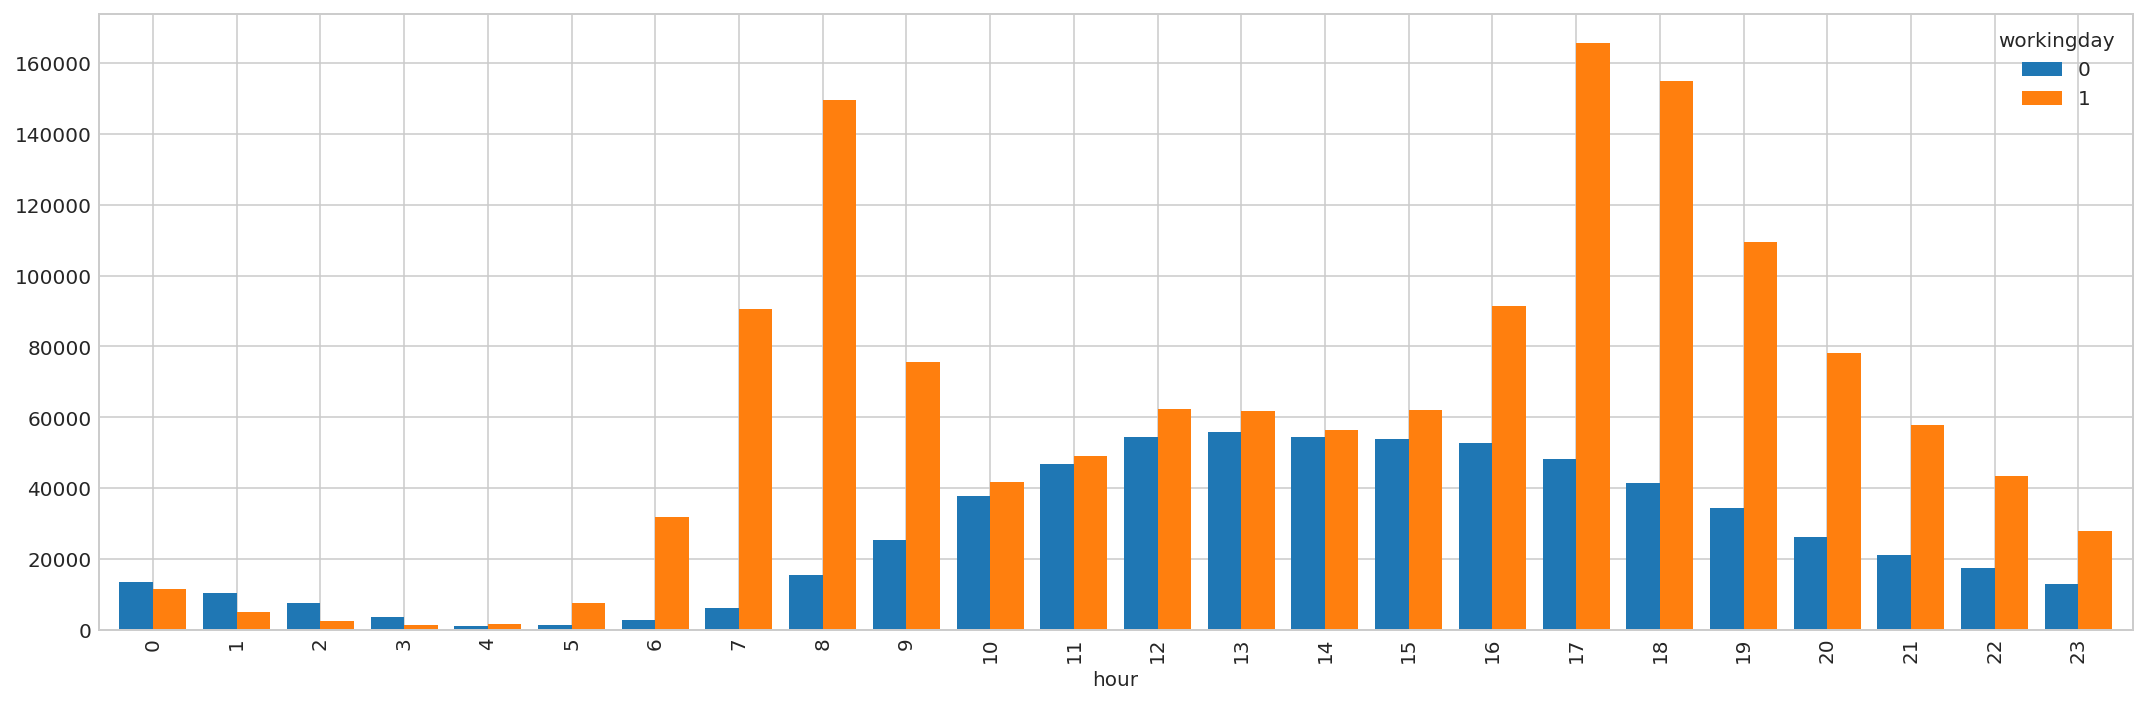

In [24]:
# rentals by hour, split by working day (or not)
by_hour.plot(kind='bar', figsize=(15,5), width=0.8);
plt.grid(True)
plt.tight_layout();

In [25]:
train_df = all_df[all_df['data_set'] == 'train'].copy()

In [ ]:
#train_df.boxplot(column='count', by='hour', figsize=(15,5))
#plt.ylabel('Count of Users')
#plt.title("Boxplot of Count grouped by hour")
#plt.suptitle("") # get rid of the pandas autogenerated title

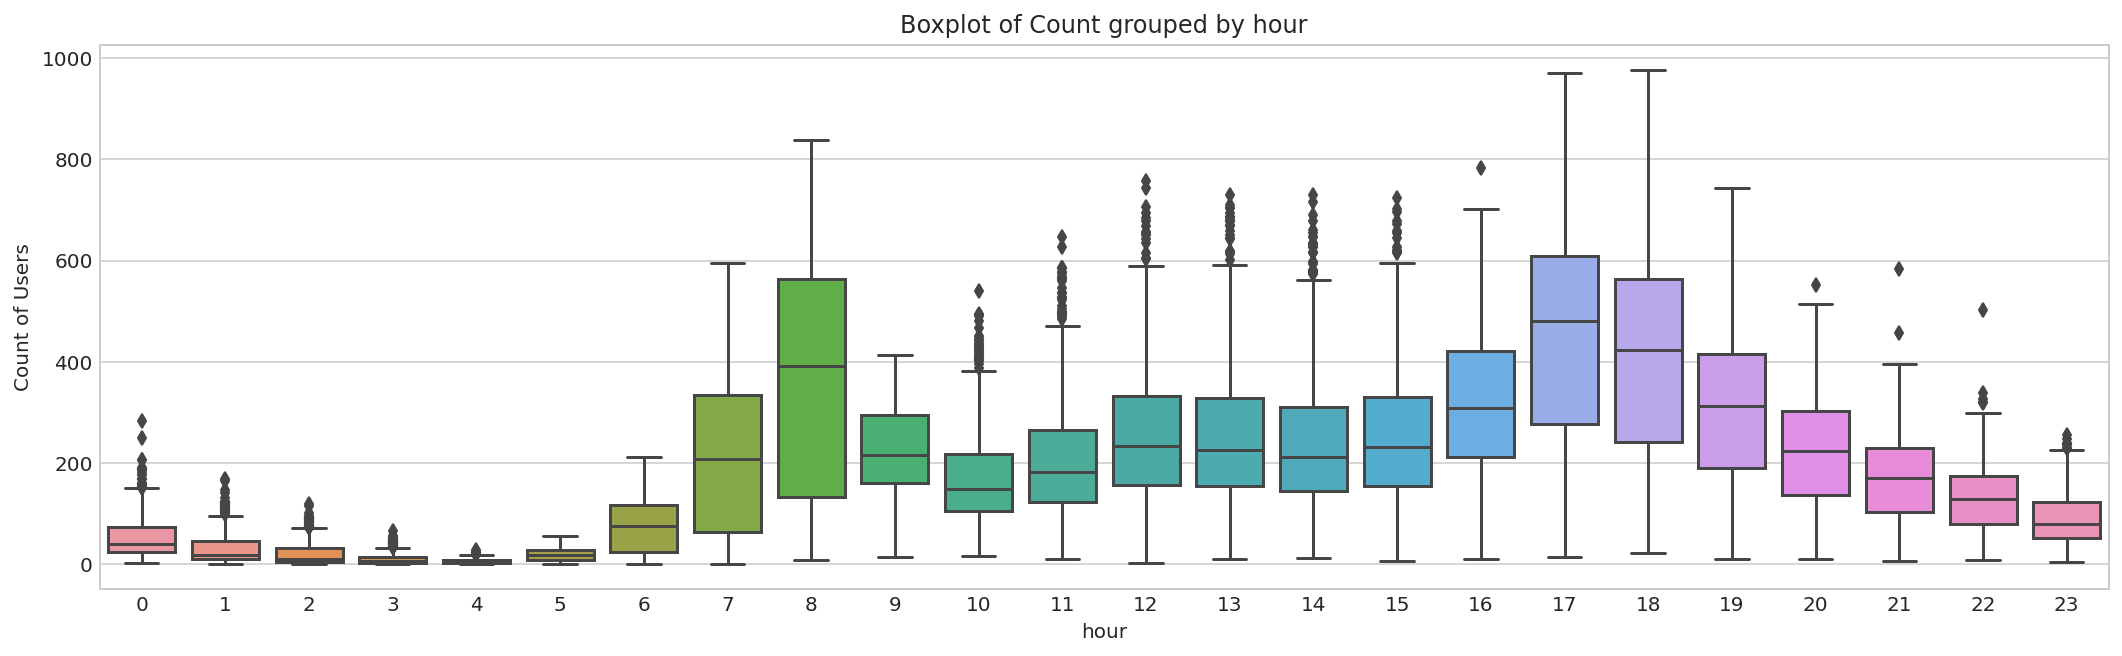

In [26]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=train_df['hour'], y=train_df['count'], ax=ax)
ax.set_ylabel('Count of Users')
ax.set_title("Boxplot of Count grouped by hour");
#plt.suptitle("") # get rid of the pandas autogenerated title

In [27]:
all_df['weather'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weather, dtype: int64

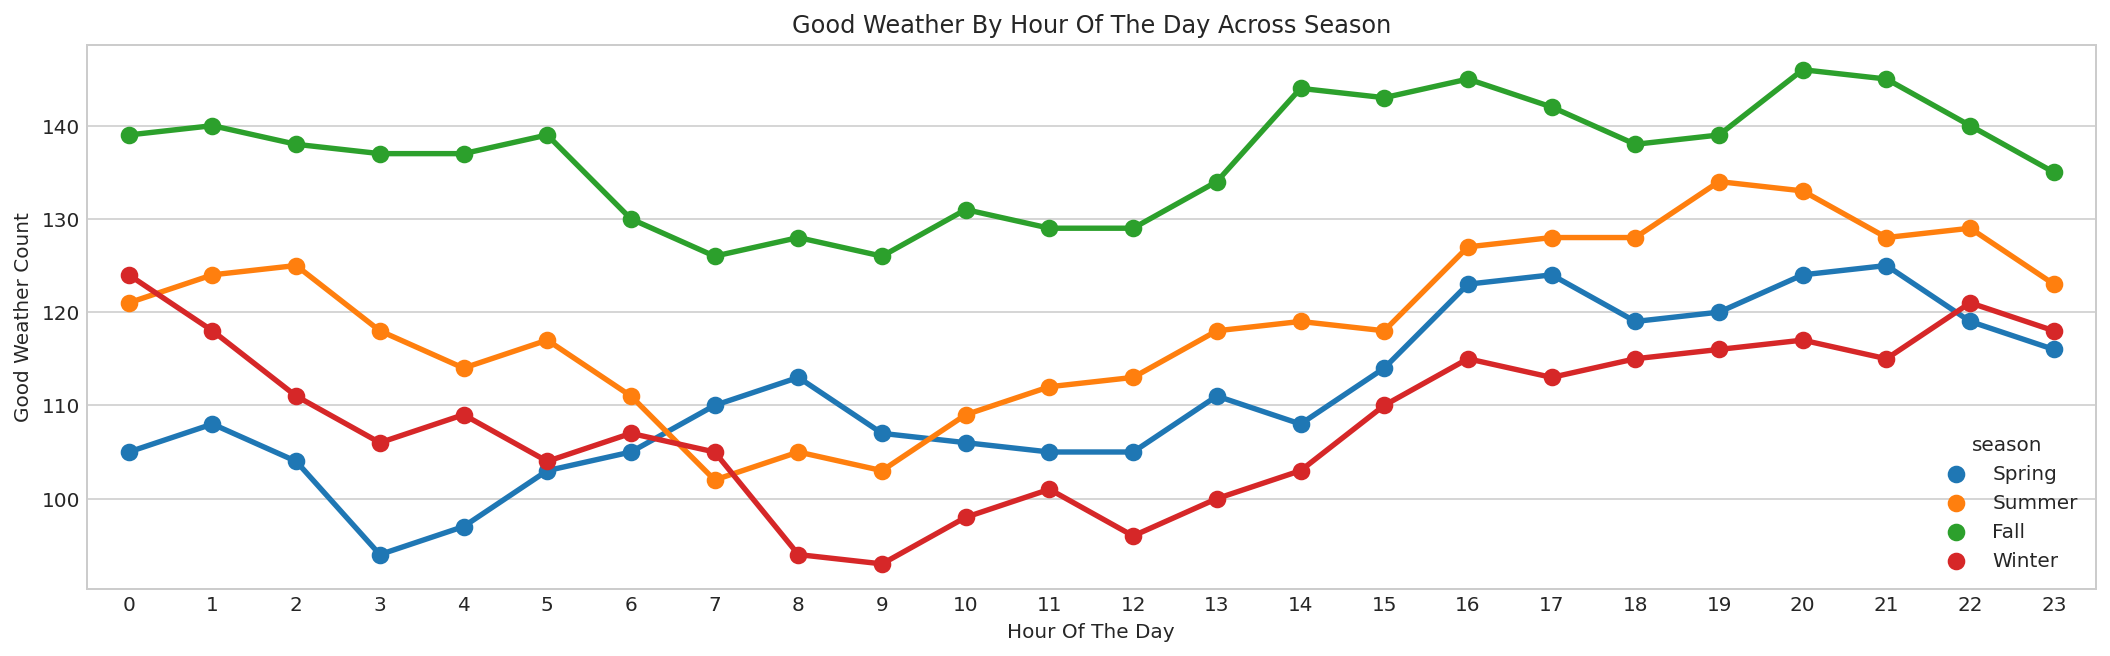

In [28]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
good_weather = all_df[all_df['weather'] == 1][['hour', 'season']].copy()
data = pd.DataFrame({'count' : good_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Good Weather Count', title="Good Weather By Hour Of The Day Across Season");

In [32]:
#Normal Weather happens most frequent in Spring  そんなことはない。
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
normal_weather = all_df[all_df['weather'] == 2][['hour', 'season']].copy()
data = pd.DataFrame({'count' : normal_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

In [33]:
data.sample(n=5)
data.head(3)

,hour,season,count
0,0,Spring,59
1,0,Summer,48
2,0,Fall,36


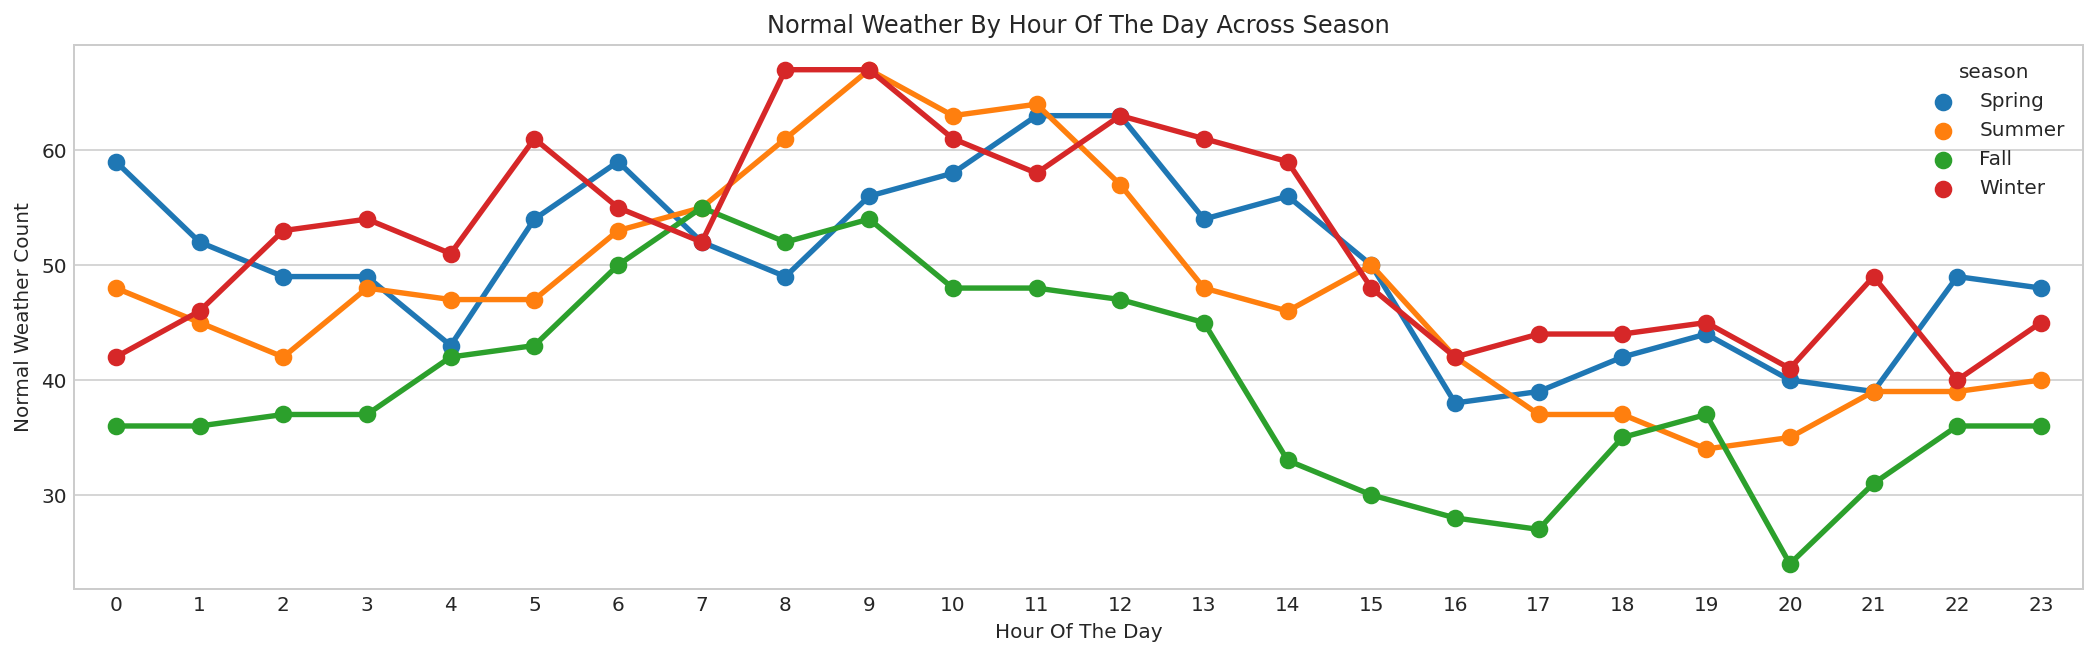

In [34]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

In [35]:
data = pd.pivot_table(data, values='count', columns='season', index='hour')
data.sample(5)

season,Fall,Spring,Summer,Winter
hour,,,,
10,48,58,63,61
6,50,59,53,55
7,55,52,55,52
2,37,49,42,53
8,52,49,61,67


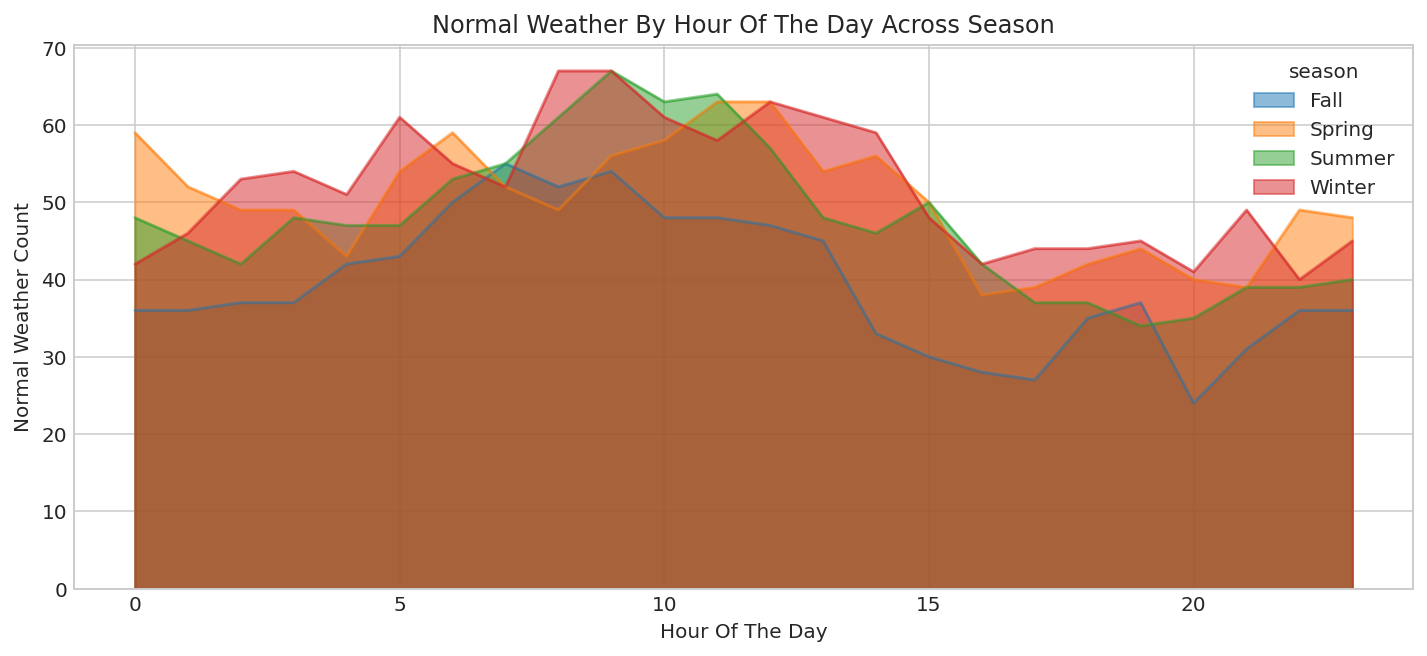

In [36]:
#上記のグラフと言っていることは同じのように思える
fig, ax = plt.subplots(figsize=(12, 5))
data.plot.area(stacked=False, ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

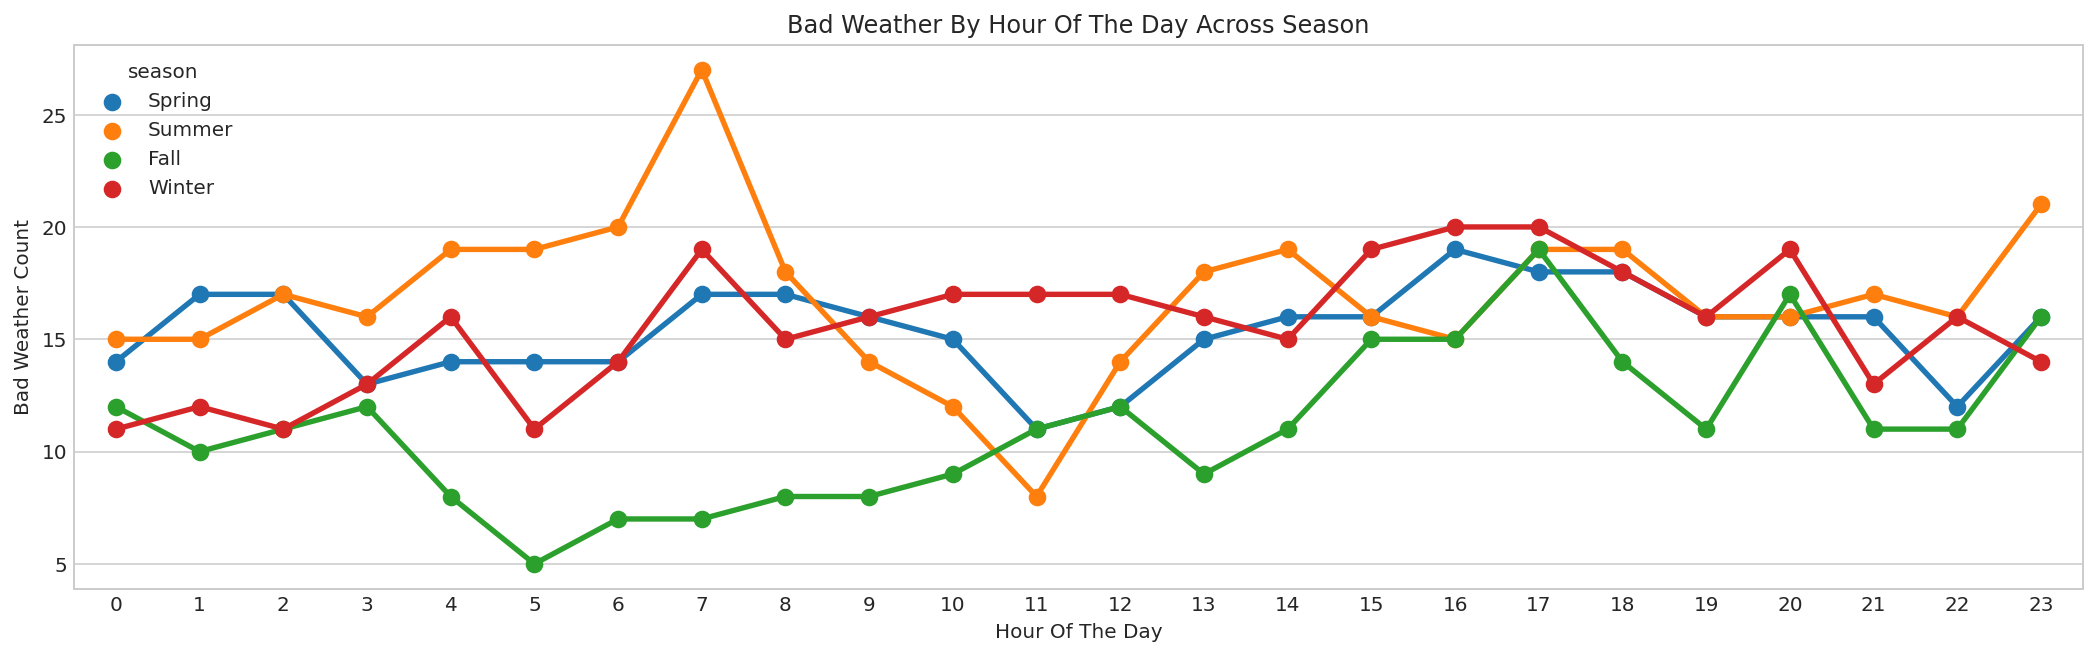

In [37]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
bad_weather = all_df[all_df['weather'] == 3][['hour', 'season']].copy()
data = pd.DataFrame({'count' : bad_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Bad Weather Count', title="Bad Weather By Hour Of The Day Across Season");

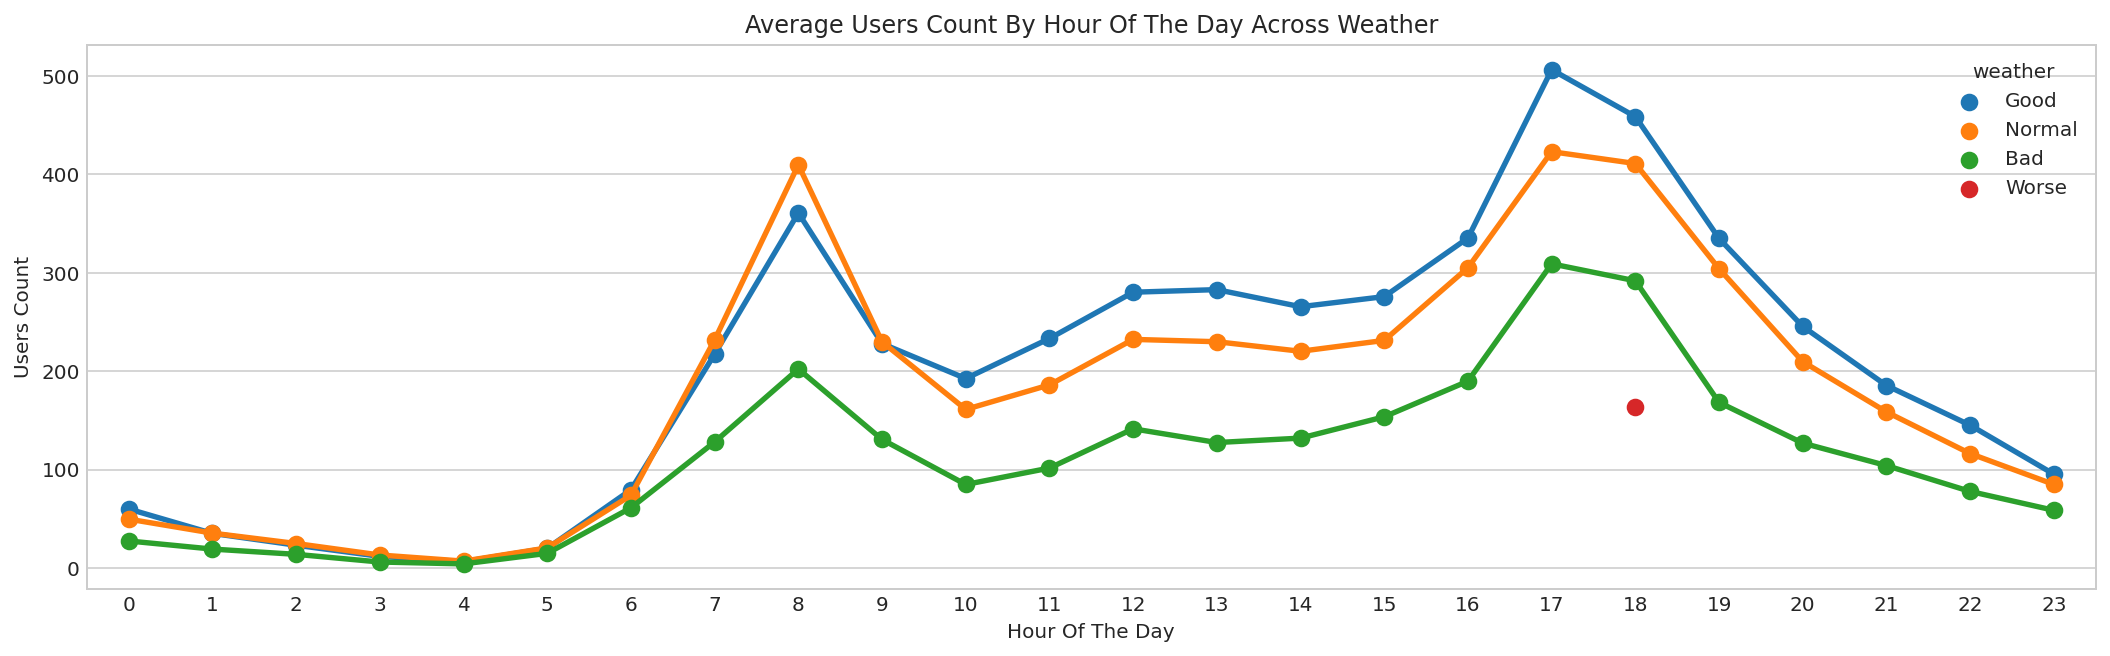

In [38]:
#下の書き方よりも、短くわかりやすい
weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}
data = train_df.groupby(["hour","weather"])["count"].mean().reset_index()
data['weather'] = data['weather'].map(lambda d : weather_map[d])
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["weather"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weather");

In [ ]:
#weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}
#data = pd.DataFrame(train_df.groupby(["hour","weather"], sort=True)["count"].mean()).reset_index()
#data['weather'] = data['weather'].map(lambda d : weather_map[d])
#fig, ax = plt.subplots(figsize=(18, 5))
#sns.pointplot(x=data["hour"], y=data["count"], hue=data["weather"], ax=ax)
#ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weather");

In [39]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
#data = pd.DataFrame({'mean':train_df.groupby(["hour","season"], sort=True)["count"].mean()}).reset_index()
#data['season'] = data['season'].map(lambda d : season_map[d])

In [40]:
data = train_df.groupby(["hour","season"])["count"].mean().reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])
data = data.rename(columns={'count':'mean'})

In [41]:
data

,hour,season,mean
0,0,Spring,28.292035
1,0,Summer,58.473684
2,0,Fall,75.675439
3,0,Winter,57.877193
4,1,Spring,18.761062
...,...,...,...
91,22,Winter,126.412281
92,23,Spring,45.333333
93,23,Summer,101.684211
94,23,Fall,121.719298


In [42]:
data.sample(n=5)

,hour,season,mean
8,2,Spring,13.205607
43,10,Winter,186.298246
53,13,Summer,289.991228
75,18,Winter,426.675439
72,18,Spring,258.157895


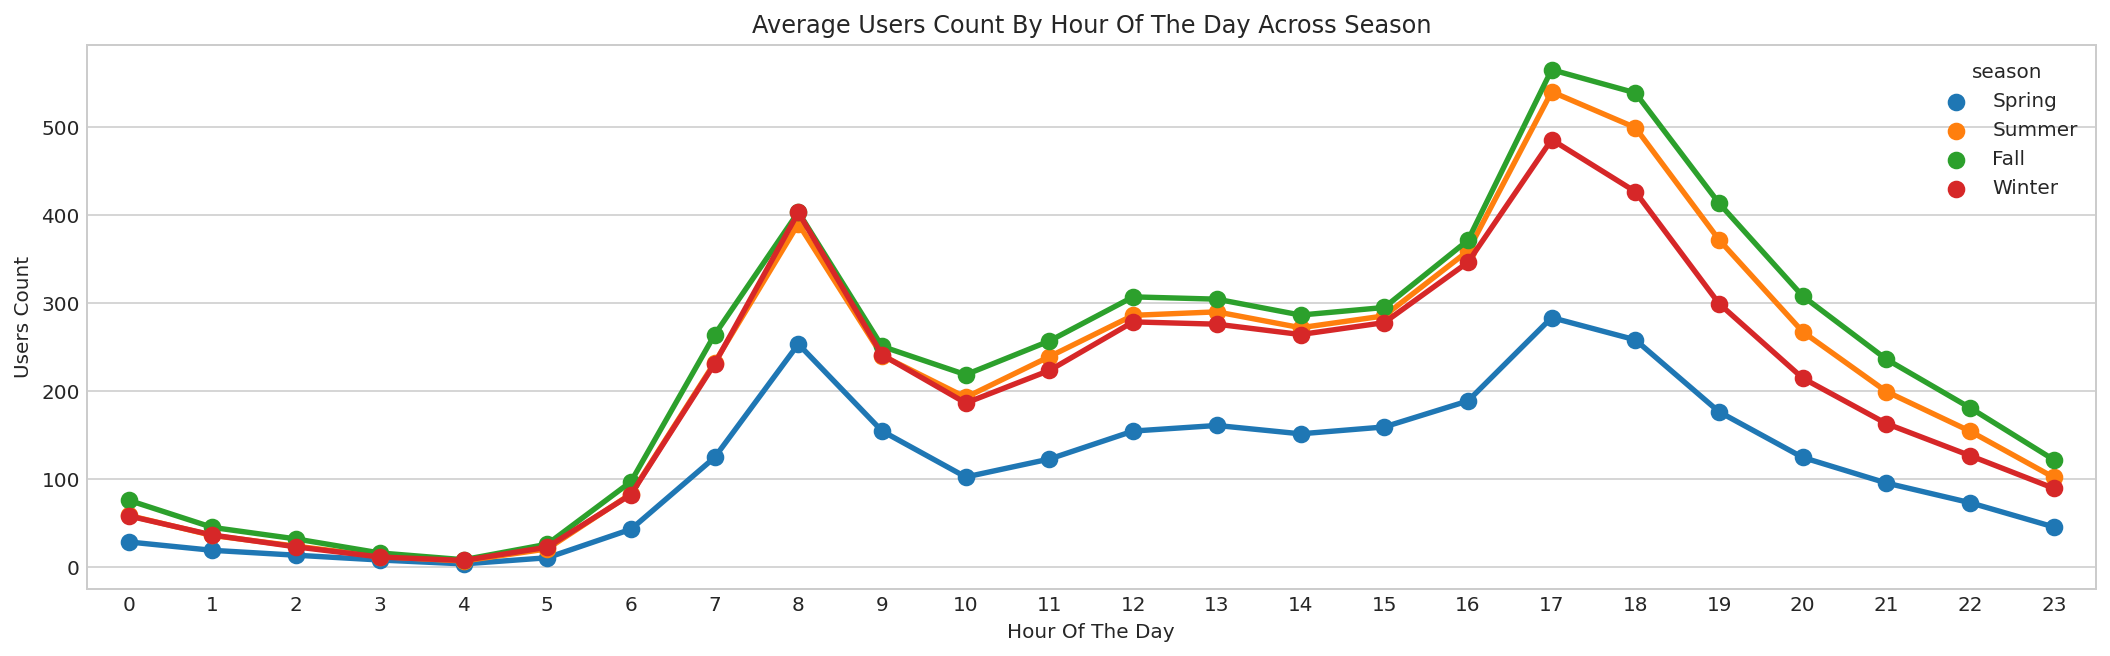

In [43]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["mean"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Season");

In [ ]:
#day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
#hueOrder = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
#data = pd.DataFrame({'mean':train_df.groupby(["hour","dow"], sort=True)["count"].mean()}).reset_index()
#data['dow'] = data['dow'].map(lambda d : day_map[d])

In [44]:
day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
hueOrder = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
data = train_df.groupby(["hour","dow"])["count"].mean().reset_index()
data['dow'] = data['dow'].map(lambda d : day_map[d])
data = data.rename(columns={'count':'mean'})

In [45]:
data.head(10) #.sample(n=5)

,hour,dow,mean
0,0,Monday,35.492308
1,0,Tuesday,27.328125
2,0,Wednesday,36.246154
3,0,Thursday,37.476923
4,0,Friday,53.234375
5,0,Saturday,98.212121
6,0,Sunday,96.227273
7,1,Monday,18.076923
8,1,Tuesday,11.904762
9,1,Wednesday,15.615385


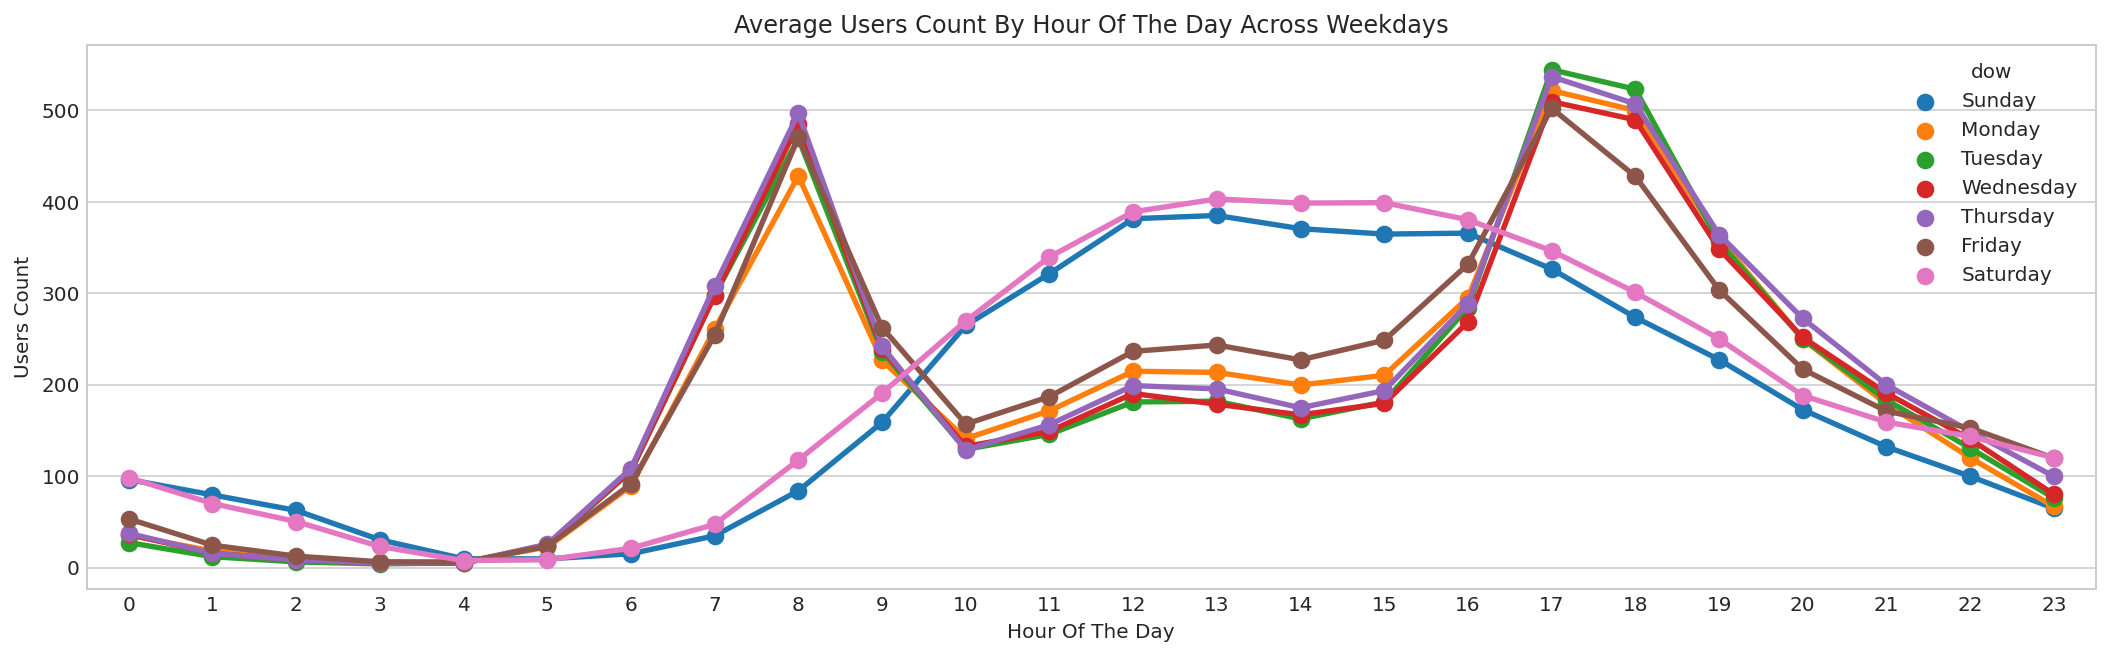

In [46]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["mean"], hue=data["dow"], hue_order=hueOrder, ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weekdays");

In [ ]:
#fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

#train_df.boxplot(column='casual', by='hour', ax=axs[0])
#axs[0].set_ylabel('casual users')
#axs[0].set_title('')

#train_df.boxplot(column='registered', by='hour', ax=axs[1])
#axs[1].set_ylabel('registered users')
#axs[1].set_title('')

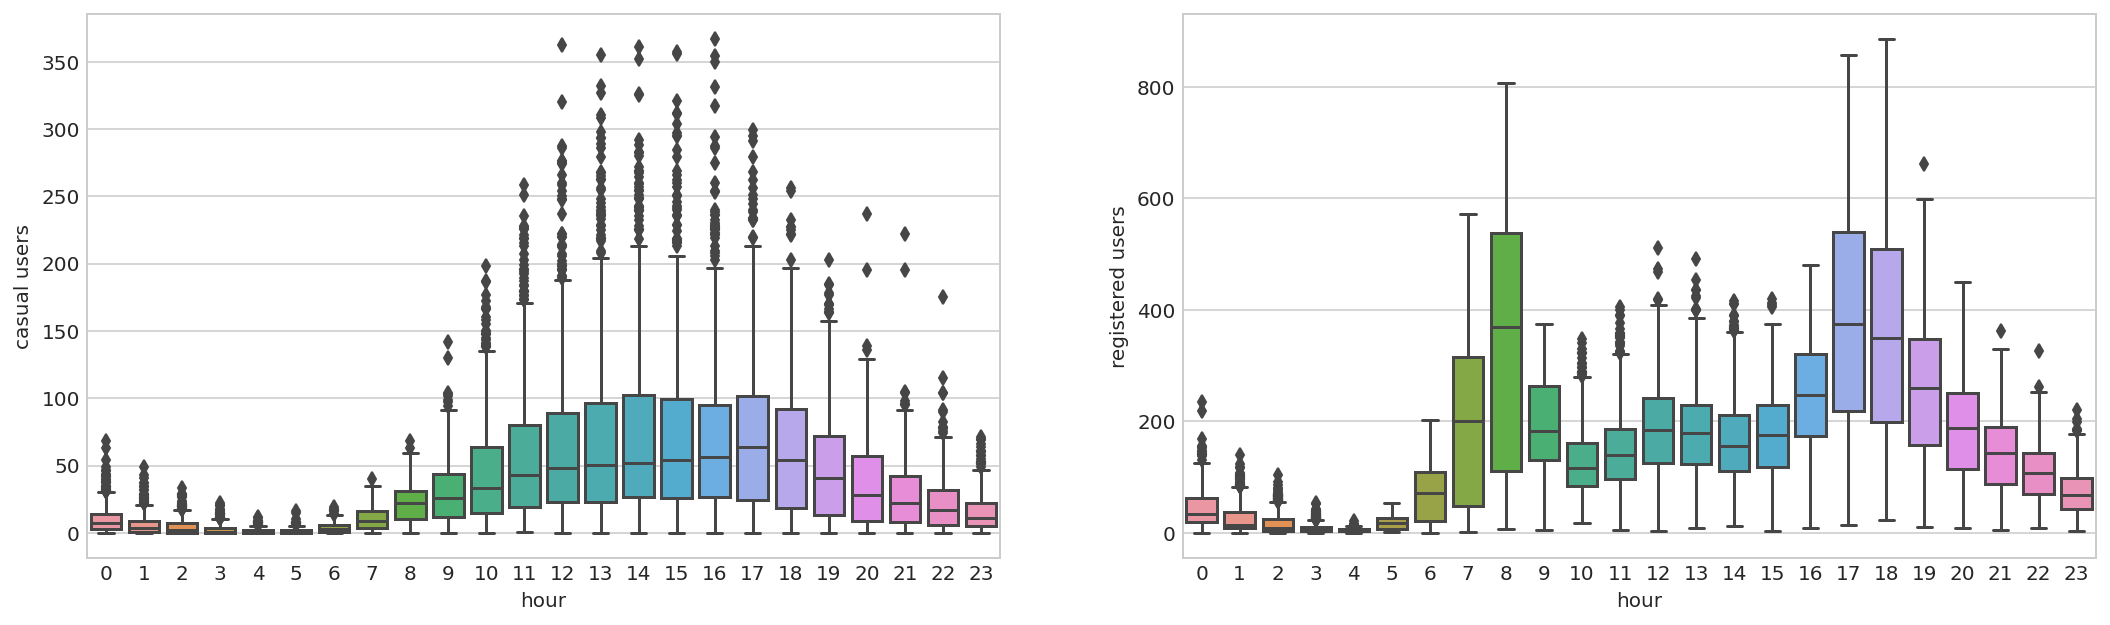

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(18,5), sharex=False, sharey=False)

sns.boxplot(x='hour', y='casual', data=train_df, ax=axs[0])
axs[0].set_ylabel('casual users')
axs[0].set_title('')

sns.boxplot(x='hour', y='registered', data=train_df, ax=axs[1])
axs[1].set_ylabel('registered users')
axs[1].set_title('');

In [48]:
train_df[["hour","casual","registered"]].head(5)

,hour,casual,registered
datetime,,,
2011-01-01 00:00:00,0,3,13
2011-01-01 01:00:00,1,8,32
2011-01-01 02:00:00,2,5,27
2011-01-01 03:00:00,3,3,10
2011-01-01 04:00:00,4,0,1


In [49]:
pd.melt(train_df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'], var_name='usertype', value_name='count').head(5)

,hour,usertype,count
0,0,casual,3
1,1,casual,8
2,2,casual,5
3,3,casual,3
4,4,casual,0


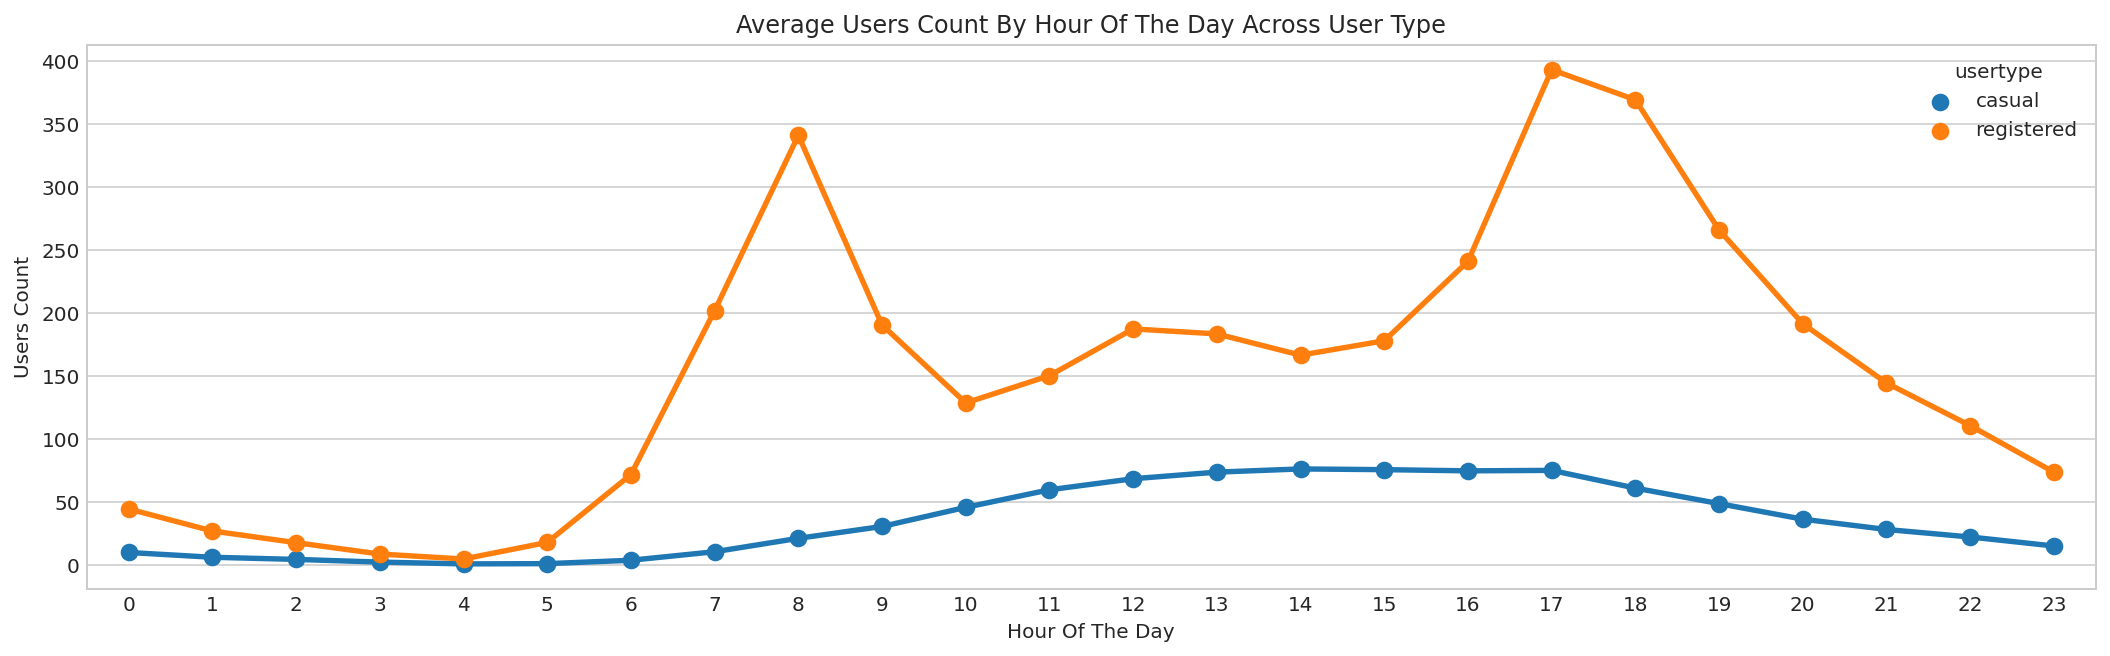

In [50]:
fig, ax = plt.subplots(figsize=(18, 5))
train_df_melt = pd.melt(train_df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'], var_name='usertype', value_name='count')
data = pd.DataFrame(train_df_melt.groupby(["hour", "usertype"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=data["hour"], y=data["count"], hue=data["usertype"], hue_order=["casual","registered"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title='Average Users Count By Hour Of The Day Across User Type');

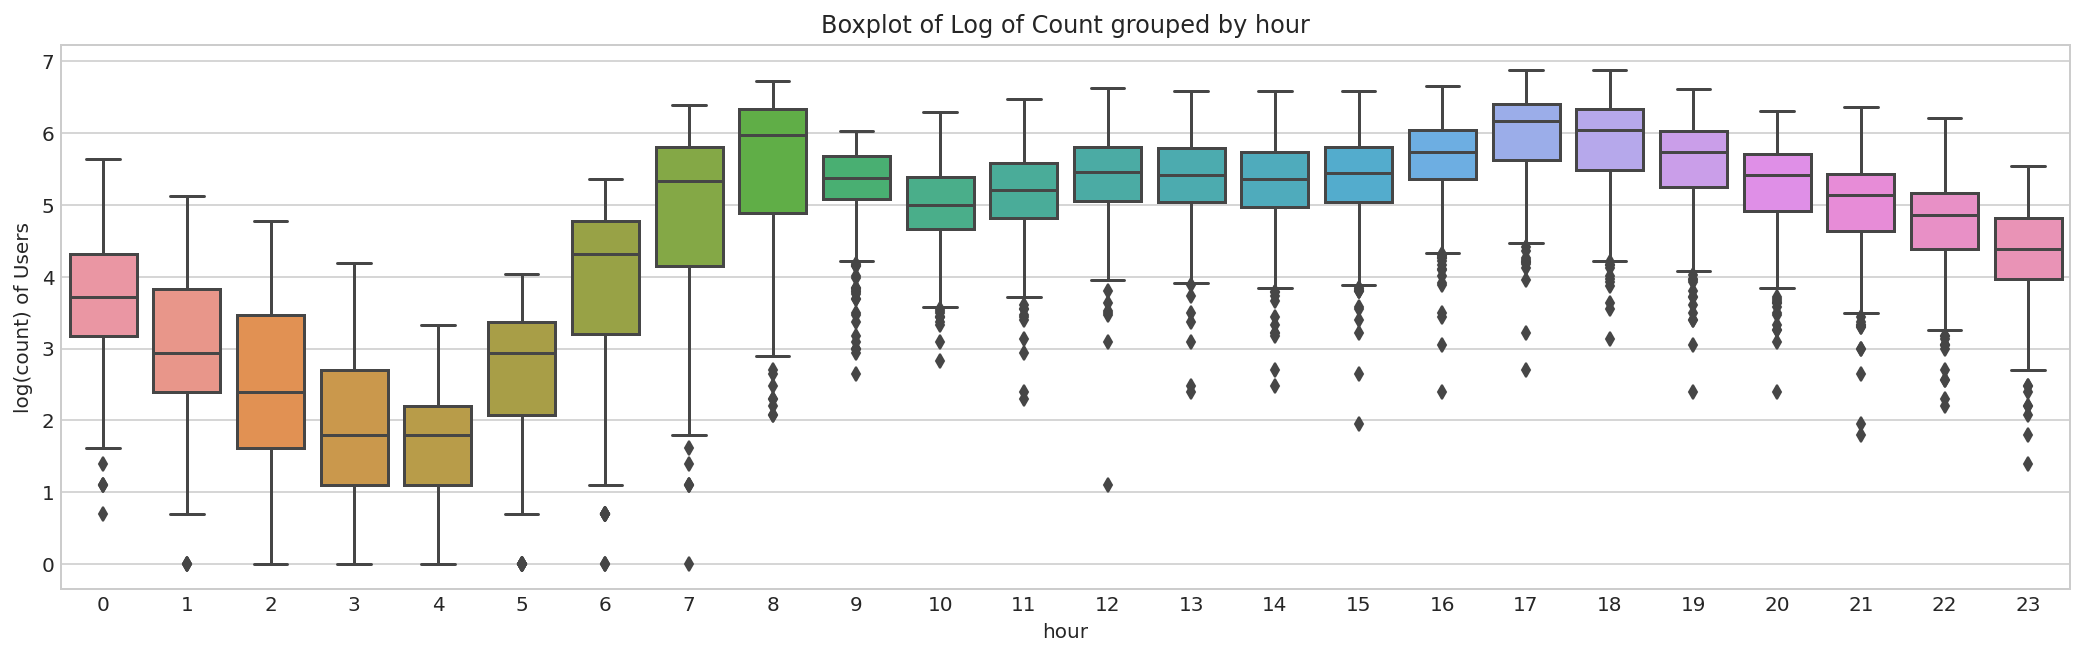

In [51]:
train_df = train_df.assign(log_count = lambda df : np.log(train_df['count']))

fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='hour', y='log_count', data=train_df, ax=ax)
ax.set(ylabel='log(count) of Users',title='Boxplot of Log of Count grouped by hour')

#plt.suptitle("") # get rid of the pandas autogenerated title
train_df.drop(['log_count'], axis = 1, inplace=True);

In [ ]:
#def hour_jitter(h):
    #return h + ((np.random.randint(low=0, high=9, size=1)[0] - 4) / 10)
    #return h + np.random.uniform(-0.4, 0.4)

In [ ]:
#def hour_format(h):
#    return "{:02d}:00 AM".format(h) if h <= 12 else "{:02d}:00 PM".format(h%12)

In [ ]:
# jitter plot
#import matplotlib.colors as mcolors
#import matplotlib.cm as cm

# color_map = plt.get_cmap("jet")
#color_map = mcolors.ListedColormap(list(["#5e4fa2", "#3288bd", "#66c2a5", "#abdda4", "#e6f598", "#fee08b", "#fdae61", "#f46d43", "#d53e4f", "#9e0142"]))
#train_df['hour_jitter'] = train_df['hour'].map(hour_jitter)
#train_df[train_df['workingday'] == 1].plot(kind="scatter", x='hour_jitter', y='count',
#    figsize=(18,6),
#    c='temp', cmap=color_map, colorbar=True,
#    sharex=False)

#hours = np.unique(train_df['hour'].values)
#hour_labels = [hour_format(h) for h in hours]
#plt.xticks(hours, hour_labels, rotation='vertical');

In [52]:
tmp = train_df.copy()#[train_df['temp'] <= 2]

In [53]:
tmp.loc[tmp['temp'] < 10,'temp_cat'] = 1
tmp.loc[(tmp['temp'] >= 10) & (tmp['temp'] < 20),'temp_cat'] = 2
tmp.loc[(tmp['temp'] >= 20) & (tmp['temp'] < 25),'temp_cat'] = 3
tmp.loc[(tmp['temp'] >= 25) & (tmp['temp'] < 30),'temp_cat'] = 4
tmp.loc[(tmp['temp'] >= 30) & (tmp['temp'] < 35),'temp_cat'] = 5
tmp.loc[(tmp['temp'] >= 35),'temp_cat'] = 6

<AxesSubplot:xlabel='hour', ylabel='count'>

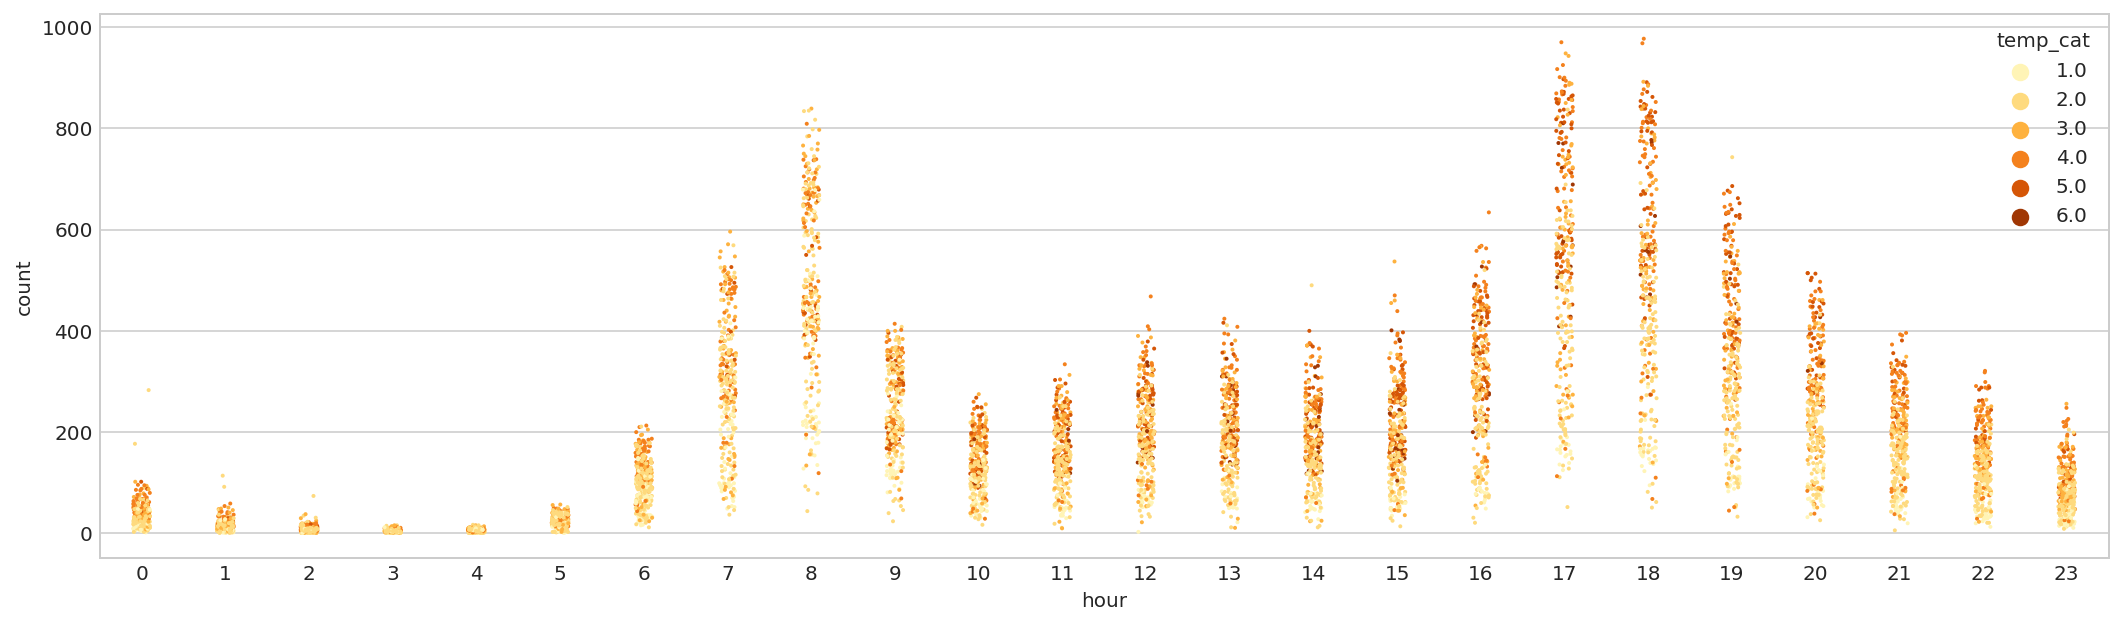

In [54]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.stripplot(x='hour', y='count', data=tmp[tmp['workingday'] == 1], hue='temp_cat',ax=ax,
              jitter=True, palette="YlOrBr", size=2)#palette='Dark2

In [ ]:
#train_df.drop('hour_jitter', axis=1, inplace=True);

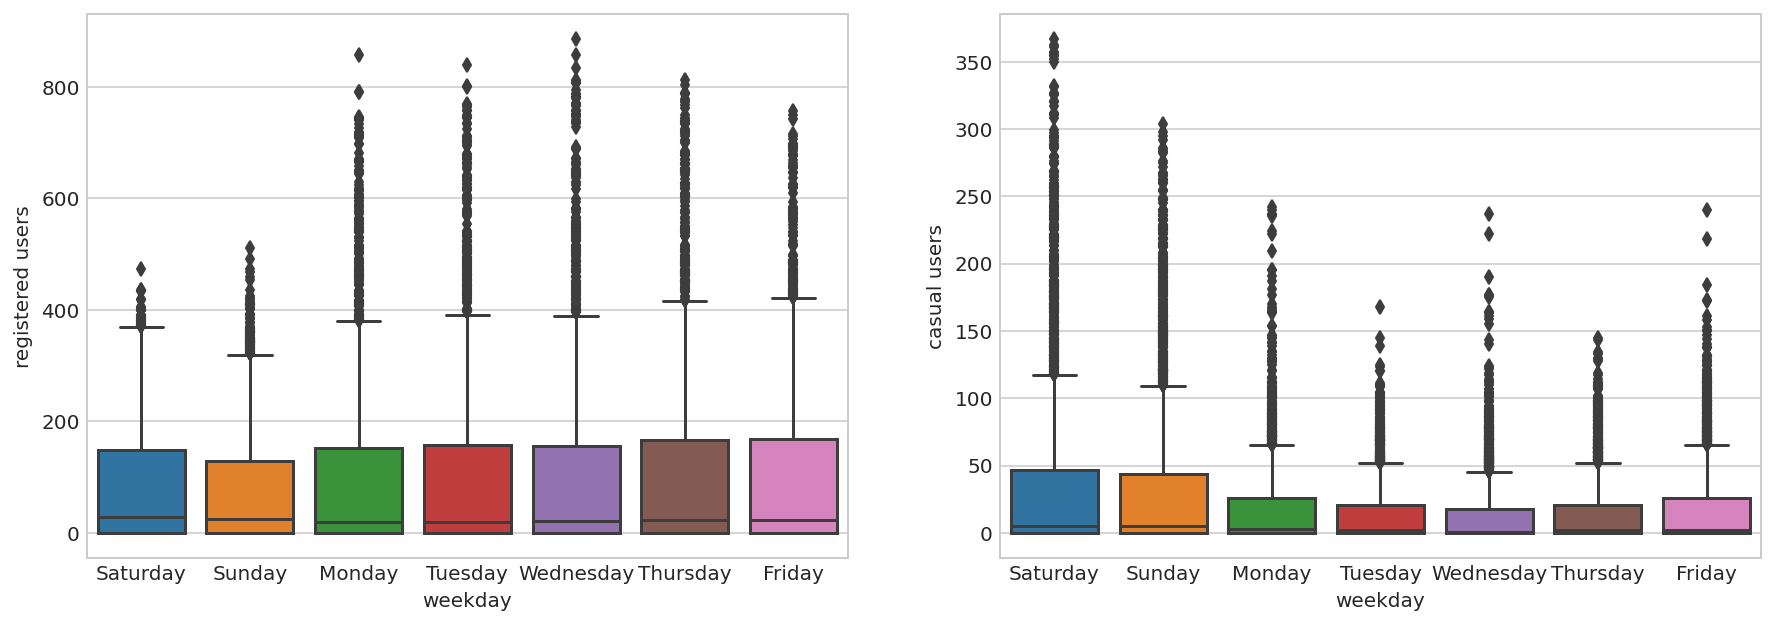

In [55]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
all_df['weekday'] = all_df['dow'].map(dayOfWeek)

fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

sns.boxplot(x='weekday', y='registered', data=all_df, ax=axs[0])
axs[0].set_ylabel('registered users')
axs[0].set_title('')

sns.boxplot(x='weekday', y='casual', data=all_df, ax=axs[1])
axs[1].set_ylabel('casual users')
axs[1].set_title('')

all_df.drop('weekday', axis=1, inplace=True);

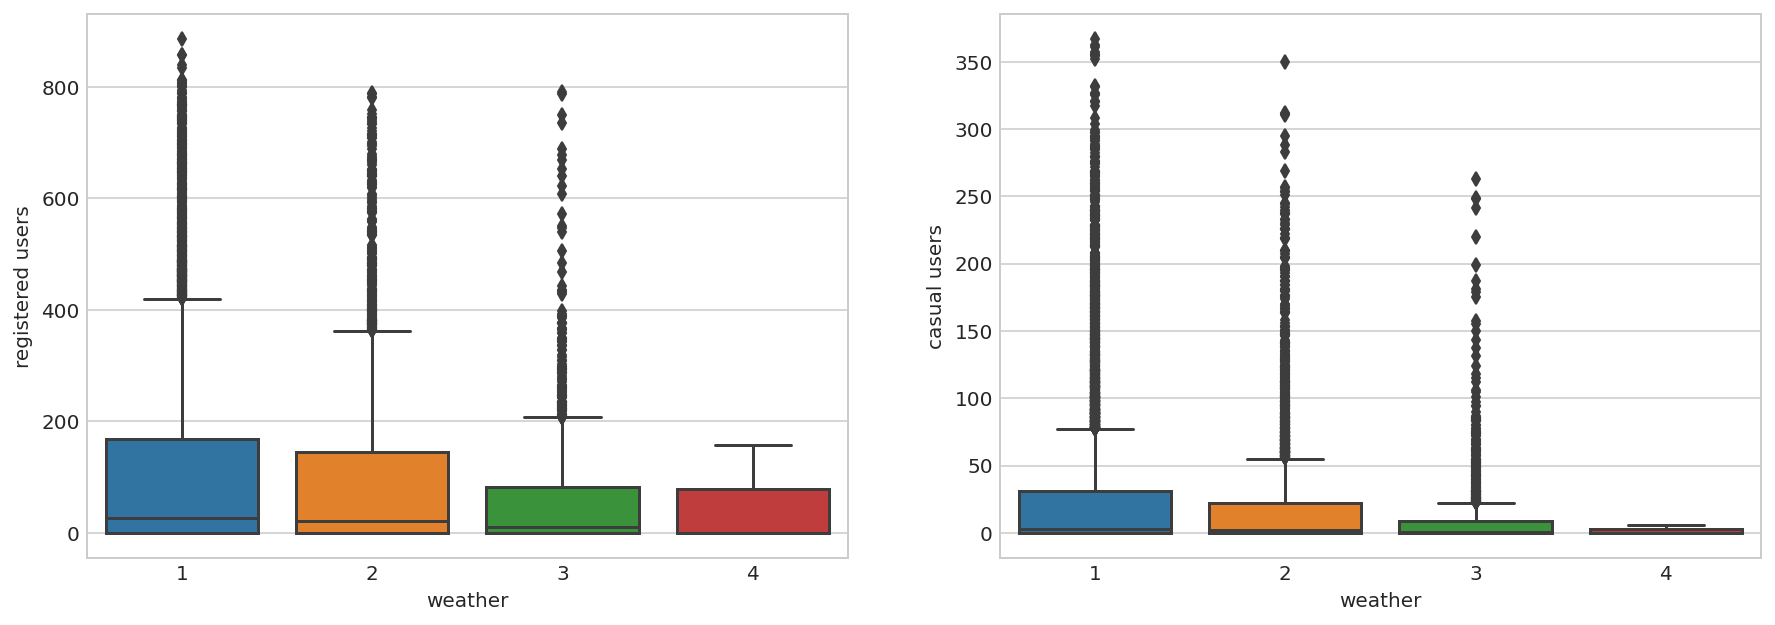

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

sns.boxplot(x='weather', y='registered', data=all_df, ax=axs[0])
axs[0].set_ylabel('registered users')
axs[0].set_title('')

sns.boxplot(x='weather', y='casual', data=all_df, ax=axs[1])
axs[1].set_ylabel('casual users')
axs[1].set_title('');

In [57]:
sub_df = train_df[['count', 'registered', 'casual', 'temp', 'atemp', 'humidity', 'windspeed', 'workingday', 'holiday']]

In [58]:
sub_df.corr()

,count,registered,casual,temp,atemp,humidity,windspeed,workingday,holiday
count,1.000000,0.970948,0.690414,0.394454,0.389784,-0.317371,0.101369,0.011965,-0.008049
registered,0.970948,1.000000,0.497250,0.318571,0.314635,-0.265458,0.091052,0.120154,-0.023038
casual,0.690414,0.497250,1.000000,0.467097,0.462067,-0.348187,0.092276,-0.319864,0.040464
temp,0.394454,0.318571,0.467097,1.000000,0.984948,-0.064949,-0.017852,0.033174,0.002969
atemp,0.389784,0.314635,0.462067,0.984948,1.000000,-0.043536,-0.057473,0.027851,-0.003455
humidity,-0.317371,-0.265458,-0.348187,-0.064949,-0.043536,1.000000,-0.318607,-0.011039,0.012114
windspeed,0.101369,0.091052,0.092276,-0.017852,-0.057473,-0.318607,1.000000,0.018454,-0.000585
workingday,0.011965,0.120154,-0.319864,0.033174,0.027851,-0.011039,0.018454,1.000000,-0.213189
holiday,-0.008049,-0.023038,0.040464,0.002969,-0.003455,0.012114,-0.000585,-0.213189,1.000000


<AxesSubplot:>

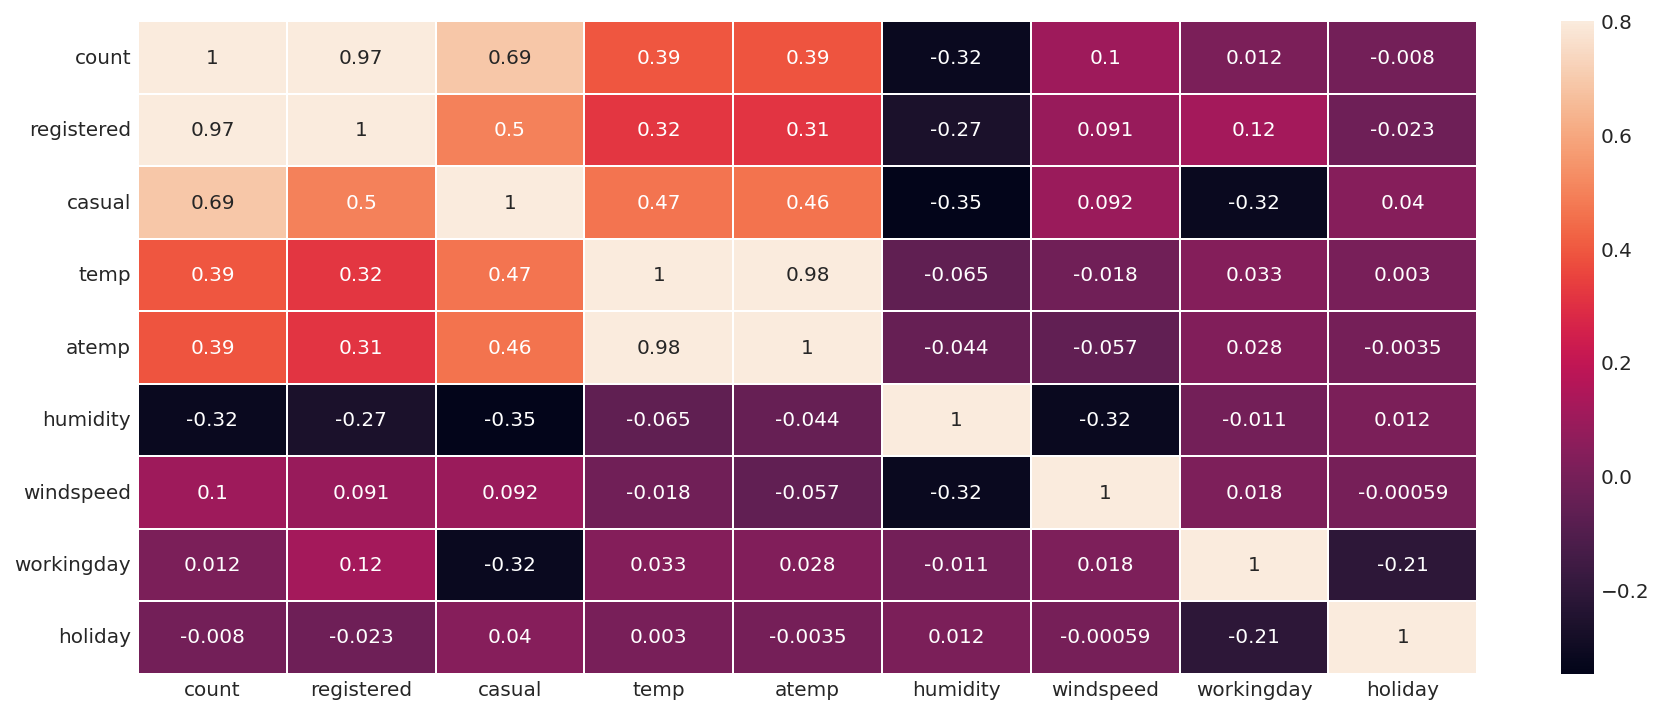

In [61]:
corrMatt = sub_df.corr()
#mask = np.zeros_like(corrMatt)
#mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corrMatt,  vmax=0.8, square=False, annot=True, ax=ax, linewidths=1)#mask=mask,

In [62]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
data = all_df[['data_set', 'season']].copy()
data['season'] = data['season'].map(lambda d : season_map[d])

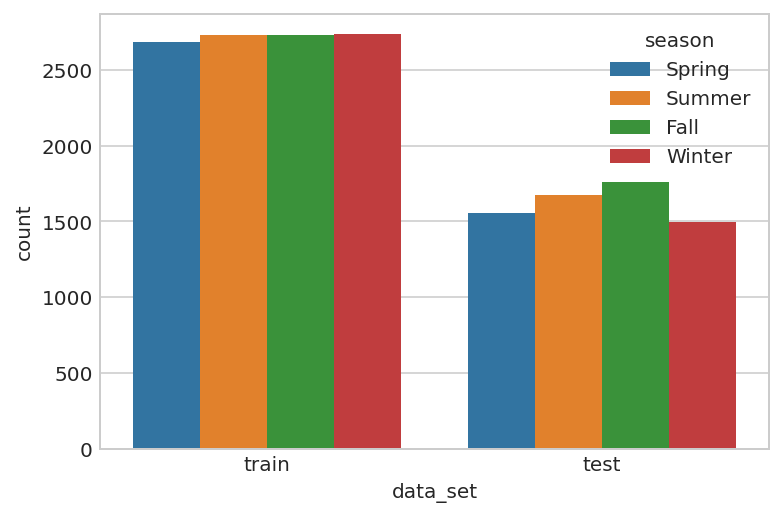

In [63]:
sns.countplot(x="data_set", hue="season", data=data);

In [64]:
weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}
data = all_df[['data_set', 'weather']].copy()
data['weather'] = data['weather'].map(lambda d : weather_map[d])

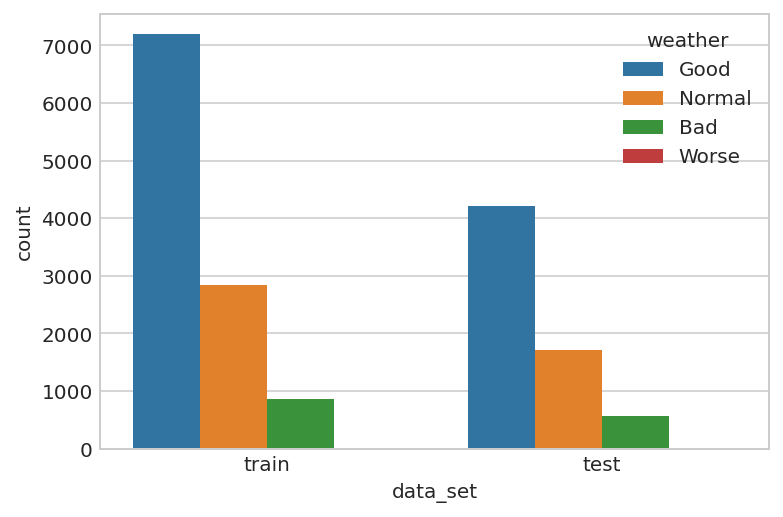

In [65]:
sns.countplot(x="data_set", hue="weather", data=data);


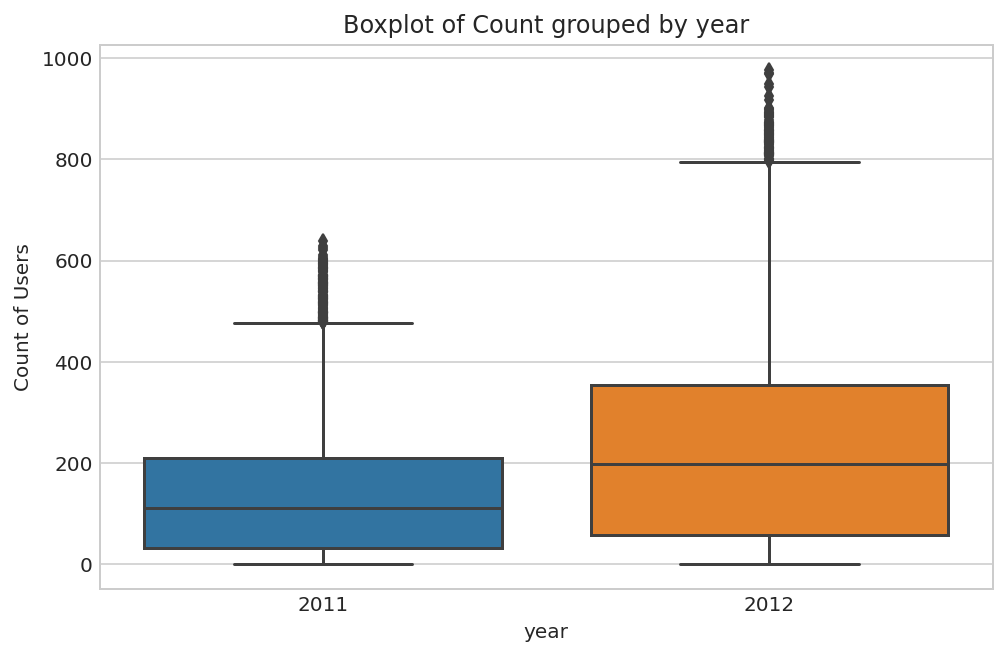

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='year', y='count', data=train_df)
plt.ylabel('Count of Users')
plt.title("Boxplot of Count grouped by year");

In [72]:
all_df[all_df['holiday']==1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set,casual_log,registered_log,count_log,date,day,month,year,hour,dow,woy,count_season
datetime,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-30 13:00:00,2012-10-30 13:00:00,4,1,1,3,12.3,13.635,81,23.9994,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,13,1,44,544034
2012-10-30 14:00:00,2012-10-30 14:00:00,4,1,1,3,12.3,13.635,81,23.9994,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,14,1,44,544034
2012-10-30 15:00:00,2012-10-30 15:00:00,4,1,1,3,12.3,14.395,87,16.9979,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,15,1,44,544034
2012-10-30 16:00:00,2012-10-30 16:00:00,4,1,1,3,12.3,14.395,87,16.9979,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,16,1,44,544034
2012-10-30 17:00:00,2012-10-30 17:00:00,4,1,1,3,12.3,14.395,87,15.0013,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,17,1,44,544034
2012-10-30 18:00:00,2012-10-30 18:00:00,4,1,1,3,12.3,15.150,87,8.9981,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,18,1,44,544034
2012-10-30 19:00:00,2012-10-30 19:00:00,4,1,1,2,20.5,24.240,68,12.9980,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,19,1,44,544034
2012-10-30 20:00:00,2012-10-30 20:00:00,4,1,1,2,12.3,14.395,81,12.9980,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,20,1,44,544034
2012-10-30 21:00:00,2012-10-30 21:00:00,4,1,1,2,12.3,15.910,87,7.0015,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,21,1,44,544034


In [68]:
tmp = all_df

In [69]:
tmp['holiday'] = tmp[['month', 'day', 'holiday', 'year']]\
    .apply(lambda df: 1 if (df['year'] == 2012 and df['month'] == 10 and df['day'] == 30) else 0, axis = 1)

In [71]:
tmp[tmp['holiday']==1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set,casual_log,registered_log,count_log,date,day,month,year,hour,dow,woy,count_season
datetime,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-30 13:00:00,2012-10-30 13:00:00,4,1,1,3,12.3,13.635,81,23.9994,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,13,1,44,544034
2012-10-30 14:00:00,2012-10-30 14:00:00,4,1,1,3,12.3,13.635,81,23.9994,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,14,1,44,544034
2012-10-30 15:00:00,2012-10-30 15:00:00,4,1,1,3,12.3,14.395,87,16.9979,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,15,1,44,544034
2012-10-30 16:00:00,2012-10-30 16:00:00,4,1,1,3,12.3,14.395,87,16.9979,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,16,1,44,544034
2012-10-30 17:00:00,2012-10-30 17:00:00,4,1,1,3,12.3,14.395,87,15.0013,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,17,1,44,544034
2012-10-30 18:00:00,2012-10-30 18:00:00,4,1,1,3,12.3,15.150,87,8.9981,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,18,1,44,544034
2012-10-30 19:00:00,2012-10-30 19:00:00,4,1,1,2,20.5,24.240,68,12.9980,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,19,1,44,544034
2012-10-30 20:00:00,2012-10-30 20:00:00,4,1,1,2,12.3,14.395,81,12.9980,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,20,1,44,544034
2012-10-30 21:00:00,2012-10-30 21:00:00,4,1,1,2,12.3,15.910,87,7.0015,0,0,0,test,0.0,0.0,0.0,2012-10-30,30,10,2012,21,1,44,544034


In [ ]:
# feature engineer a new column whether its a peak hour or not
all_df['peak'] = all_df[['hour', 'workingday']]\
    .apply(lambda df: 1 if ((df['workingday'] == 1 and (df['hour'] == 8 or 17 <= df['hour'] <= 18)) \
                            or (df['workingday'] == 0 and 10 <= df['workingday'] <= 19)) else 0, axis = 1)

In [ ]:
#ここの修正の仕方は、間違っているので要修正！
# sandy
all_df['holiday'] = all_df[['month', 'day', 'holiday', 'year']]\
    .apply(lambda df: 1 if (df['year'] == 2012 and df['month'] == 10 and df['day'] == 30) else 0, axis = 1)

# christmas and others
all_df['holiday'] = all_df[['month', 'day', 'holiday']]\
    .apply(lambda df: 1 if (df['month'] == 12 and df['day'] in [24, 26, 31]) else df['holiday'], axis = 1)
all_df['workingday'] = all_df[['month', 'day', 'workingday']]\
    .apply(lambda df: 0 if df['month'] == 12 and df['day'] in [24, 31] else df['workingday'], axis = 1)

In [ ]:
# from histogram
all_df['ideal'] = all_df[['temp', 'windspeed']]\
    .apply(lambda df: 1 if (df['temp'] > 27 and df['windspeed'] < 30) else 0, axis = 1)
    
all_df['sticky'] = all_df[['humidity', 'workingday']]\
    .apply(lambda df: 1 if (df['workingday'] == 1 and df['humidity'] >= 60) else 0, axis = 1)

In [ ]:
all_df.sample(10)

In [ ]:
# instead of randomly splitting our training data 
# for cross validation, let's construct a framework that's more
# in line with how the data is divvied up for this competition
# (given first 19 days of each month, what is demand for remaining days)
# so, let's split our training data into 2 time contiguous datasets
# for fitting and validating our model (days 1-14 vs. days 15-19).

# also, since submissions are evaluated based on the
# root mean squared logarithmic error (RMSLE), let's replicate
# that computation as we test and tune our model.

train_df = all_df[all_df['data_set'] == 'train']
test_df = all_df[all_df['data_set'] == 'test']

def get_rmsle(y_pred, y_actual):
    diff = np.log(y_pred + 1) - np.log(y_actual + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

def custom_train_valid_split(data, cutoff_day=15):
    train = data[data['day'] <= cutoff_day]
    valid = data[data['day'] > cutoff_day]

    return train, valid

def prep_train_data(data, input_cols):
    X = data[input_cols].values
    y_r = data['registered_log'].values
    y_c = data['casual_log'].values

    return X, y_r, y_c

# predict on validation set & transform output back from log scale
def predict_on_validation_set(model, input_cols):
    
    train, valid = custom_train_valid_split(train_df)

    # prepare training & validation set
    X_train, y_train_r, y_train_c = prep_train_data(train, input_cols)
    X_valid, y_valid_r, y_valid_c = prep_train_data(valid, input_cols)

    model_r = model.fit(X_train, y_train_r)
    y_pred_r = np.exp(model_r.predict(X_valid)) - 1

    model_c = model.fit(X_train, y_train_c)
    y_pred_c = np.exp(model_c.predict(X_valid)) - 1

    y_pred_comb = np.round(y_pred_r + y_pred_c)
    y_pred_comb[y_pred_comb < 0] = 0

    y_actual_comb = np.exp(y_valid_r) + np.exp(y_valid_c) - 2

    rmsle = get_rmsle(y_pred_comb, y_actual_comb)
    return (y_pred_comb, y_actual_comb, rmsle)


# predict on test set & transform output back from log scale
def predict_on_test_set(model, input_cols):
    
    # prepare training set
    X_train, y_train_r, y_train_c = prep_train_data(train_df, input_cols)

    # prepare testing set
    X_test = test_df[input_cols].values
    
    model_c = model.fit(X_train, y_train_c)
    y_pred_c = np.exp(model_c.predict(X_test)) - 1

    model_r = model.fit(X_train, y_train_r)
    y_pred_r = np.exp(model_r.predict(X_test)) - 1
    
    # add casual & registered predictions together
    y_pred_comb = np.round(y_pred_r + y_pred_c)
    y_pred_comb[y_pred_comb < 0] = 0
    
    return y_pred_comb

In [ ]:
params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf_model = RandomForestRegressor(**params)
rf_cols = [
    'weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday', 'sticky',
    'hour', 'dow', 'woy', 'peak'
    ]

(rf_pred, rf_actual, rf_rmsle) = predict_on_validation_set(rf_model, rf_cols)

In [ ]:
print(rf_rmsle)

In [ ]:
all_df[rf_cols].corr()

In [ ]:
params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gbm_model = GradientBoostingRegressor(**params)
gbm_cols = [
    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
    'holiday', 'workingday', 'season',
    'hour', 'dow', 'year', 'ideal', 'count_season',
]

(gbm_pred, gbm_actual, gbm_rmsle) = predict_on_validation_set(gbm_model, gbm_cols)

In [ ]:
print(gbm_rmsle)

In [ ]:
all_df[gbm_cols].corr()

In [ ]:
# the blend gives a better score on the leaderboard, even though it does not on the validation set
y_pred = np.round(.2*rf_pred + .8*gbm_pred)
print(get_rmsle(y_pred, rf_actual))

In [ ]:
rf_pred = predict_on_test_set(rf_model, rf_cols)
gbm_pred = predict_on_test_set(gbm_model, gbm_cols)

y_pred = np.round(.2*rf_pred + .8*gbm_pred)

In [ ]:
# output predictions for submission
submit_manual_blend_df = test_df[['datetime', 'count']].copy()
submit_manual_blend_df['count'] = y_pred

In [ ]:
submit_manual_blend_df.head(5)

In [ ]:
submit_manual_blend_df.to_csv('output/submit_manual_blend.csv', index=False)

In [ ]:
# Level 0 RandomForestRegressor
rf_params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf_model = RandomForestRegressor(**rf_params)
rf_cols = [
    'weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday', 'sticky',
    'hour', 'dow', 'woy', 'peak'
    ]

In [ ]:
# Level 0 GradientBoostingRegressor
gbm_params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gbm_model = GradientBoostingRegressor(**gbm_params)
gbm_cols = [
    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
    'holiday', 'workingday', 'season',
    'hour', 'dow', 'year', 'ideal', 'count_season',
]

In [ ]:
clf_input_cols = [rf_cols, gbm_cols]
clfs = [rf_model, gbm_model]

In [ ]:
# Create train and test sets for blending and Pre-allocate the data
blend_train = np.zeros((train_df.shape[0], len(clfs)))
blend_test = np.zeros((test_df.shape[0], len(clfs)))

In [ ]:
# For each classifier, we train the classifier with its corresponding input_cols 
# and record the predictions on the train and the test set
for clf_index, (input_cols, clf) in enumerate(zip(clf_input_cols, clfs)):
    
    # prepare training and validation set
    X_train, y_train_r, y_train_c = prep_train_data(train_df, input_cols)
    
    # prepare testing set
    X_test = test_df[input_cols].values
    
    model_r = clf.fit(X_train, y_train_r)
    y_pred_train_r = np.exp(model_r.predict(X_train)) - 1
    y_pred_test_r = np.exp(model_r.predict(X_test)) - 1

    model_c = clf.fit(X_train, y_train_c)
    y_pred_train_c = np.exp(model_c.predict(X_train)) - 1
    y_pred_test_c = np.exp(model_c.predict(X_test)) - 1

    y_pred_train_comb = np.round(y_pred_train_r + y_pred_train_c)
    y_pred_train_comb[y_pred_train_comb < 0] = 0
    
    y_pred_test_comb = np.round(y_pred_test_r + y_pred_test_c)
    y_pred_test_comb[y_pred_test_comb < 0] = 0
    
    blend_train[:, clf_index] = y_pred_train_comb
    blend_test[:, clf_index] = y_pred_test_comb

In [ ]:
# Level 1 Belending Classifier using LinearRegression
from sklearn.linear_model import LinearRegression
bclf = LinearRegression(fit_intercept=False)
bclf.fit(blend_train, train_df['count'])

In [ ]:
# What is the weighted combination of the base classifiers?
bclf.coef_

In [ ]:
# Stacked and Blending predictions
y_pred_blend = np.round(bclf.predict(blend_test))

In [ ]:
# R^2 score
bclf.score(blend_train, train_df['count'])

In [ ]:
# output predictions for submission
submit_stack_blend_df = test_df[['datetime', 'count']].copy()
submit_stack_blend_df['count'] = y_pred_blend

In [ ]:
submit_stack_blend_df.head(5)

In [ ]:
submit_stack_blend_df.to_csv('output/submit_stack_blend.csv', index=False)